# Question 1: House Price Prediction


## Team Members:

#### Marcel Santos de Carvalho, id 79083
#### Loris Baudry, id 79794
#### Alex Palacios, id 73713

#### Responsible for this notebook: Loris Baudry

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Loading and Preview of the Data Frame

## 1.1. Loading 

In [5]:
# We read the file into the data frame
df = pd.read_csv('housing/train.csv')

## 1.2. Preview of the Data Frame

In [6]:
# Have a preview of the first 10 rows
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
# Find out how many data rows and columns we have
df.shape

(1460, 81)

In [9]:
a=open('housing/data_description.txt')
descr=a.read()
a.close()
print(descr)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. Clean and Prepare data for model

## 2.1. Drop Columns with lots of nulls 

In [11]:
# Drop ID column which is not a feature
df.drop(['Id'],axis=1,inplace=True)

In [12]:
# Drop of columns with lots of nulls 
df.drop(['PoolQC','Fence','MiscFeature', 'Alley'],axis=1,inplace=True)

## 2.2. Filling Missing Values

In [13]:
# filling missing categorical columns with mode
## We have chosen to fill these features with mode instead of deleting all the missing values because doing that reduces the number of rows by almost 2. Thus reducing the performance potential of the model.
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [14]:
# filling missing continuous columns with mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df.dropna()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1422 rows x 76 columns]

## 2.3. Remove Remaining Nulls

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(1422, 76)

## 2.4. Handle Categorical Data

In [17]:
# We need to adress categorical data by transform each feature into dummies variables. We used hotencoding to do this
df_text = df.select_dtypes(include=object)
one_hot = pd.get_dummies(df_text)
df_join = df.join(one_hot)
df_join.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... SaleType_ConLw SaleType_New SaleType_Oth  \
0    AllPub    Inside       Gtl  ...              0            0            0   
1    AllPub       FR2       Gtl  ...              0            0            0   
2    AllPub    Inside       Gtl  ...              0            0            0   
3    AllPub    Corner       Gtl  ...              0            0            0   
4    AllPub       FR2       Gtl  ...              0            0            0   

  SaleType_WD SaleCondition_Abnorml  SaleCondition_AdjLand  \
0           1                     0                      0   
1           1                     0                      0   
2           1                     0                      0   
3           1                     1                      0   
4           1                     0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

  SaleCondition_Partial  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 311 columns]

In [18]:
df = df_join.select_dtypes(exclude=['object'])
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 272 columns]

In [19]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=272)

In [20]:
df.shape

(1422, 272)

# 3. Select Relevant Features to build the model

## 3.1. Analysis of Features correlation with SalePrice

In [21]:
# We delete features having a correlation > 80% with another feature

corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.80:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [22]:
df.shape

(1422, 257)

In [23]:
# Analysis of features correlations with SalePrice and selection of features with a correlation > 0.40 
corr_matrix = df.corr()
corr_analysis = corr_matrix["SalePrice"].sort_values(ascending=False)
relevant_features = corr_analysis[corr_analysis>0.40]
relevant_features

SalePrice               1.000000
OverallQual             0.787985
GrLivArea               0.709303
GarageCars              0.643039
TotalBsmtSF             0.610085
FullBath                0.573755
BsmtQual_Ex             0.553768
YearBuilt               0.519014
KitchenQual_Ex          0.504655
YearRemodAdd            0.500512
Foundation_PConc        0.492300
MasVnrArea              0.470117
Fireplaces              0.461108
ExterQual_Ex            0.452715
ExterQual_Gd            0.443755
HeatingQC_Ex            0.428411
BsmtFinType1_GLQ        0.426911
GarageFinish_Fin        0.417049
Neighborhood_NridgHt    0.402007
GarageYrBlt             0.400598
Name: SalePrice, dtype: float64

In [24]:
relevant_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'BsmtQual_Ex', 'YearBuilt', 'KitchenQual_Ex',
       'YearRemodAdd', 'Foundation_PConc', 'MasVnrArea', 'Fireplaces',
       'ExterQual_Ex', 'ExterQual_Gd', 'HeatingQC_Ex', 'BsmtFinType1_GLQ',
       'GarageFinish_Fin', 'Neighborhood_NridgHt', 'GarageYrBlt'],
      dtype='object')

<AxesSubplot:>

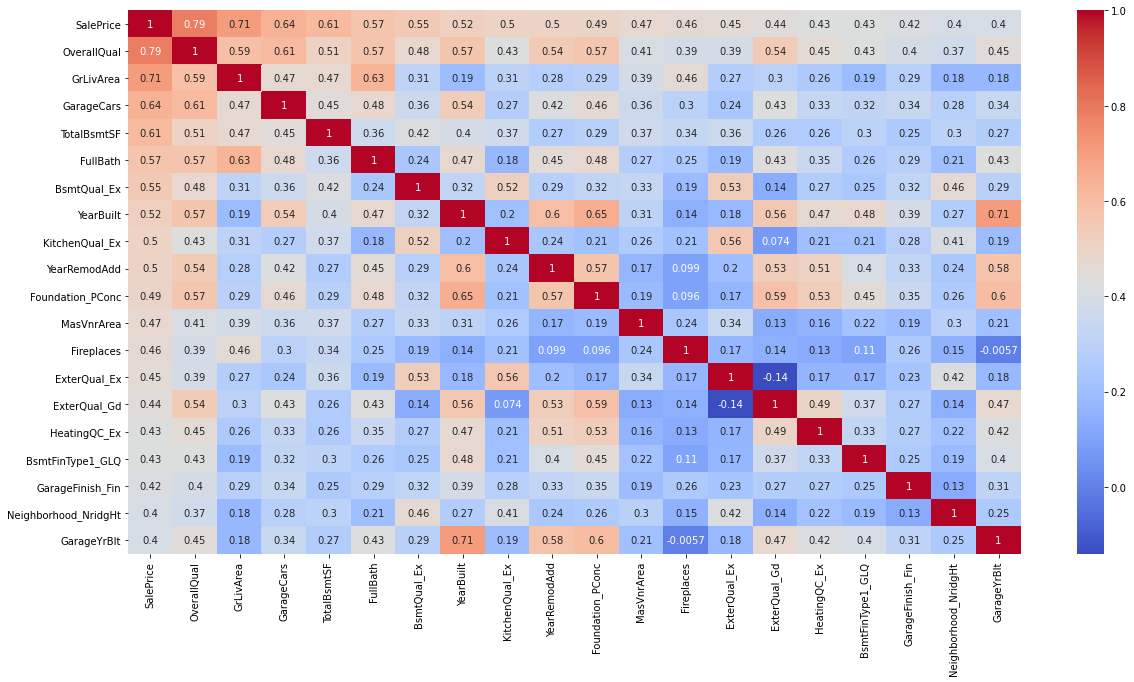

In [25]:
# How does the correlation matrix looks like
corr = df[relevant_features.index].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [26]:
X_corr = df[relevant_features.index]
X_corr=X_corr.drop('SalePrice',axis=1)

## 3.2. Analysis of Features P-values

In [27]:
#We will remove thos features having P-values higher that 5% as this means they are not statistically significant
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X_corr
y = df['SalePrice']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     322.1
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:12:06   Log-Likelihood:                -16866.
No. Observations:                1422   AIC:                         3.377e+04
Df Residuals:                    1402   BIC:                         3.388e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.592e+05 

## 3.3. Result - Selected Features

In [28]:
selected_features=X.columns[(est2.pvalues<0.05).drop('const')]
selected_features

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'BsmtQual_Ex',
       'YearBuilt', 'KitchenQual_Ex', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces', 'ExterQual_Ex', 'ExterQual_Gd', 'BsmtFinType1_GLQ',
       'Neighborhood_NridgHt'],
      dtype='object')

# 4. Visualise the data and look for outliers to remove

## 4.1. Label

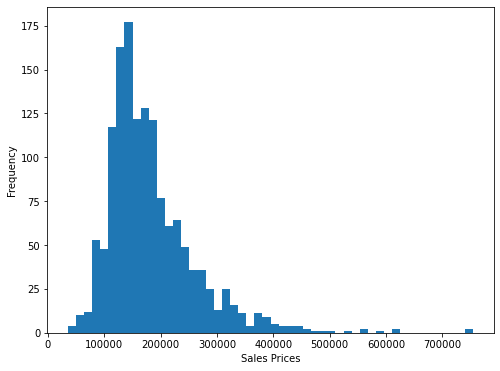

In [29]:
# Study of the distribution of the column we want to predict: SalePrice
plt.figure(figsize=(8, 6))
plt.hist(df.SalePrice,bins=50);
plt.xlabel('Sales Prices')
plt.ylabel('Frequency');

In [30]:
# we drop outliers
df = df[df.SalePrice<600000]

In [31]:
df['SalePrice'].describe()

count      1418.000000
mean     181475.057828
std       74838.466681
min       34900.000000
25%      131500.000000
50%      164995.000000
75%      215000.000000
max      582933.000000
Name: SalePrice, dtype: float64

## 4.2. Features

In [32]:
df[selected_features].describe()

OverallQual    GrLivArea   GarageCars  TotalBsmtSF  BsmtQual_Ex  \
count  1418.000000  1418.000000  1418.000000  1418.000000  1418.000000   
mean      6.136812  1515.299718     1.772920  1082.061354     0.082511   
std       1.347639   512.338546     0.742348   404.649896     0.275238   
min       1.000000   438.000000     0.000000   105.000000     0.000000   
25%       5.000000  1137.250000     1.000000   810.250000     0.000000   
50%       6.000000  1467.000000     2.000000  1004.000000     0.000000   
75%       7.000000  1779.000000     2.000000  1305.500000     0.000000   
max      10.000000  5642.000000     4.000000  6110.000000     1.000000   

         YearBuilt  KitchenQual_Ex  YearRemodAdd   MasVnrArea   Fireplaces  \
count  1418.000000     1418.000000   1418.000000  1418.000000  1418.000000   
mean   1971.550071        0.068406   1985.267278   102.898449     0.619182   
std      30.386721        0.252531     20.463536   175.890490     0.643275   
min    1872.000000        0.000000   1950.000000     0.000000     0.000000   
25%    1954.000000        0.000000   1968.000000     0.000000     0.000000   
50%    1973.000000        0.000000   1994.000000     0.000000     1.000000   
75%    2001.000000        0.000000   2004.000000   166.750000     1.000000   
max    2010.000000        1.000000   2010.000000  1600.000000     3.000000   

       ExterQual_Ex  ExterQual_Gd  BsmtFinType1_GLQ  Neighborhood_NridgHt  
count   1418.000000   1418.000000       1418.000000           1418.000000  
mean       0.035261      0.342031          0.291961              0.053597  
std        0.184504      0.474557          0.454825              0.225299  
min        0.000000      0.000000          0.000000              0.000000  
25%        0.000000      0.000000          0.000000              0.000000  
50%        0.000000      0.000000          0.000000              0.000000  
75%        0.000000      1.000000          1.000000              0.000000  
max        1.000000      1.000000          1.000000              1.000000

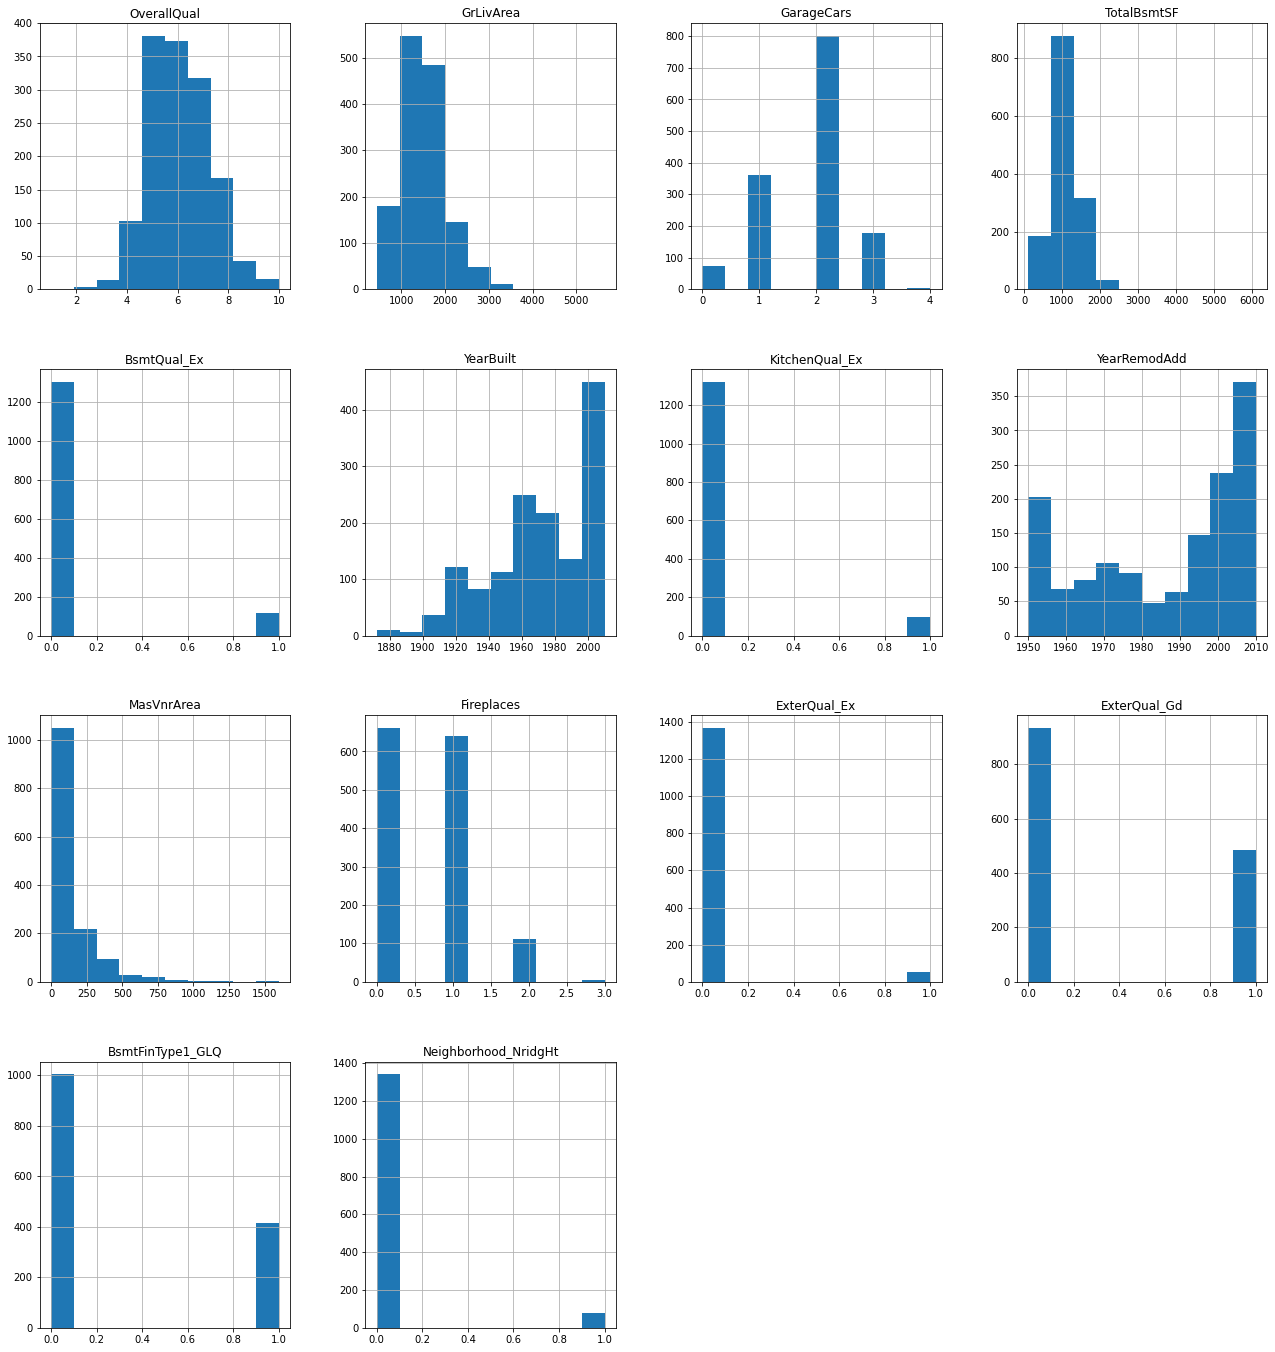

In [33]:
# Histograms of Selected Features
df[selected_features].hist(figsize=(22, 24));

In [34]:
def plotFeatureName(featureName):
    plt.figure(figsize=(8,6))
    plt.scatter(df[featureName], df['SalePrice'])  
    plt.title(featureName)
    plt.xlabel(featureName)
    plt.ylabel('price')

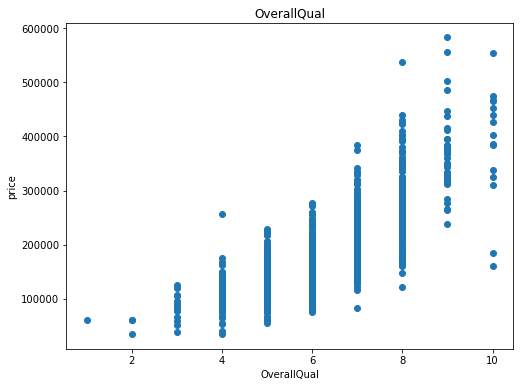

In [35]:
plotFeatureName('OverallQual')

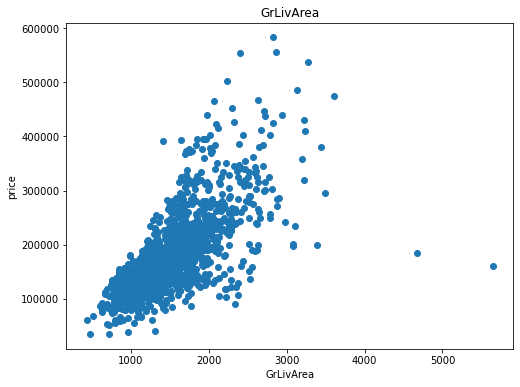

In [36]:
plotFeatureName('GrLivArea')

In [37]:
#Remove Outliers
df = df[df['GrLivArea']<4000]

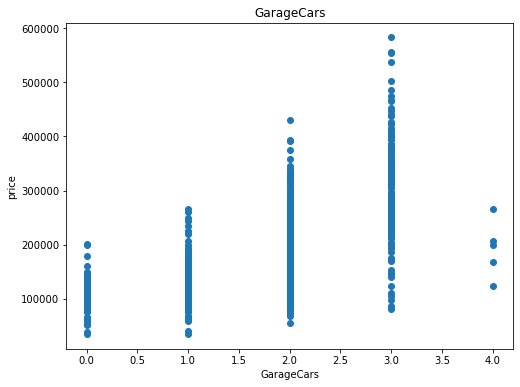

In [38]:
plotFeatureName('GarageCars')

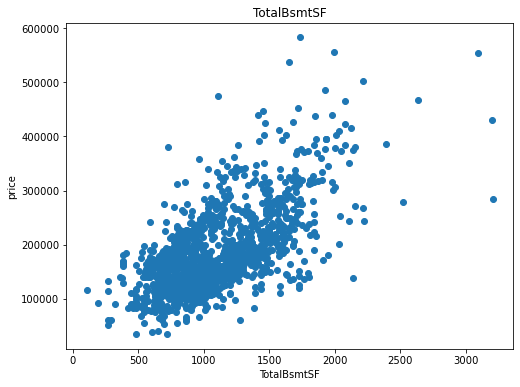

In [39]:
plotFeatureName('TotalBsmtSF')

In [40]:
#Remove Outliers
df = df[df['TotalBsmtSF']<3000]

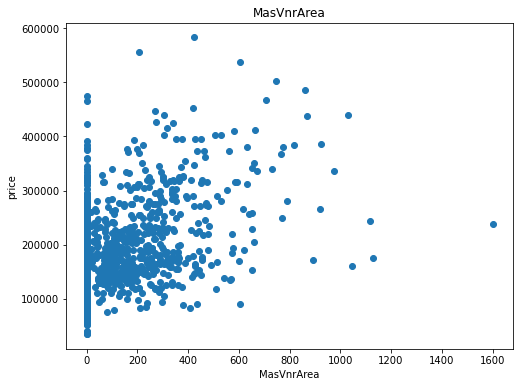

In [41]:
plotFeatureName('MasVnrArea')

In [42]:
#Remove Outliers
df = df[df['MasVnrArea']<1400]

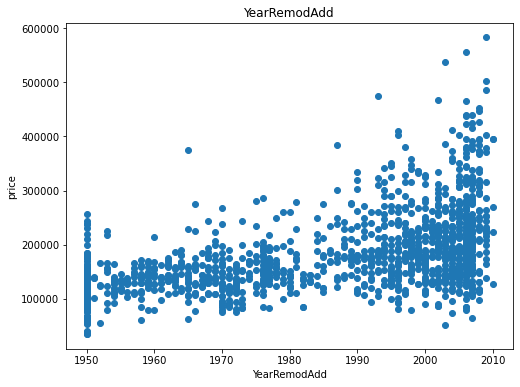

In [43]:
plotFeatureName('YearRemodAdd')

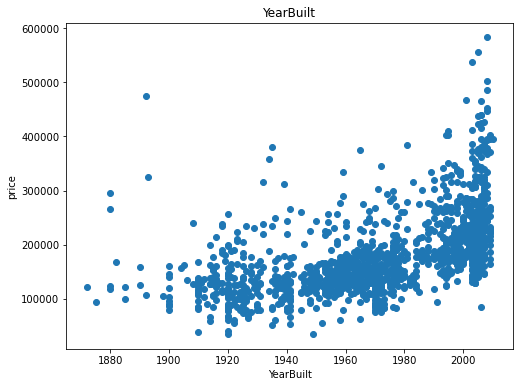

In [44]:
plotFeatureName('YearBuilt')

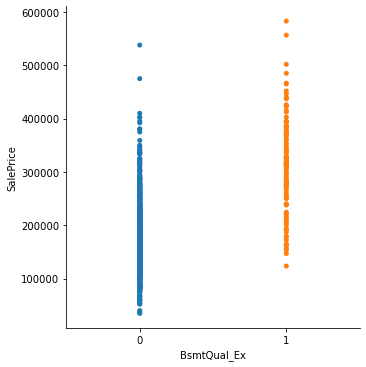

In [45]:
sns.catplot(x="BsmtQual_Ex", y="SalePrice", jitter=False, data=df)

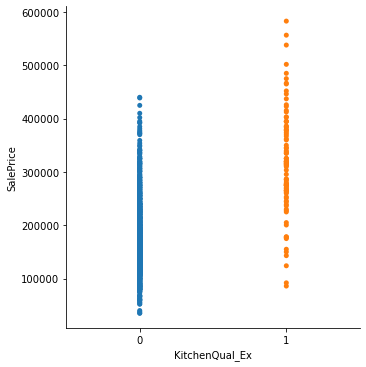

In [46]:
sns.catplot(x="KitchenQual_Ex", y="SalePrice", jitter=False, data=df)

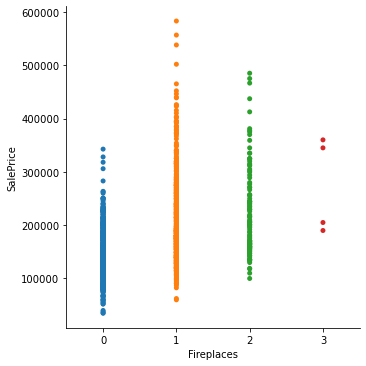

In [47]:
sns.catplot(x="Fireplaces", y="SalePrice", jitter=False, data=df)

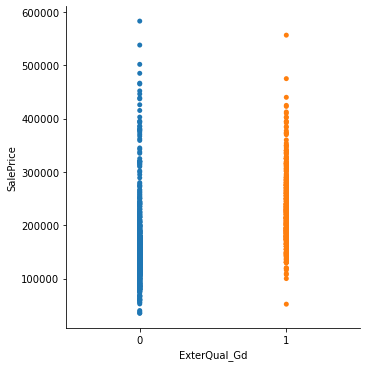

In [48]:
sns.catplot(x="ExterQual_Gd", y="SalePrice", jitter=False, data=df)

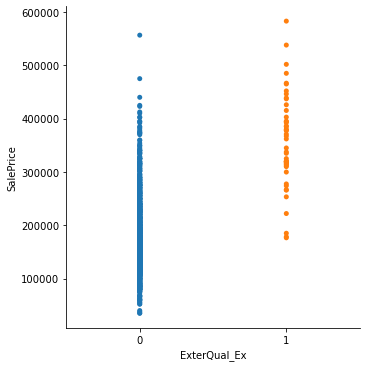

In [49]:
sns.catplot(x="ExterQual_Ex", y="SalePrice", jitter=False, data=df)

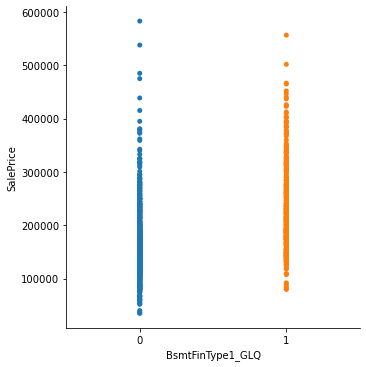

In [50]:
sns.catplot(x="BsmtFinType1_GLQ", y="SalePrice", jitter=False, data=df)

# 5. Linear Regression Model

In [51]:
X = df[selected_features]

In [52]:
y = df['SalePrice']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(946, 14)
(466, 14)
(946,)
(466,)


In [54]:
# Load linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [55]:
# Fit to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [56]:
print(pd.Series(lm.coef_, index = X.columns))

OverallQual              9512.960943
GrLivArea                  50.366693
GarageCars               7940.565914
TotalBsmtSF                31.666561
BsmtQual_Ex             20423.451899
YearBuilt                 188.174504
KitchenQual_Ex          27576.205858
YearRemodAdd              251.907573
MasVnrArea                 11.327168
Fireplaces               9899.751313
ExterQual_Ex            45082.824115
ExterQual_Gd             8227.222280
BsmtFinType1_GLQ        13561.968154
Neighborhood_NridgHt     2167.276279
dtype: float64


In [57]:
lm.intercept_

-892008.158979196

In [58]:
y_pred = lm.predict(X_test)

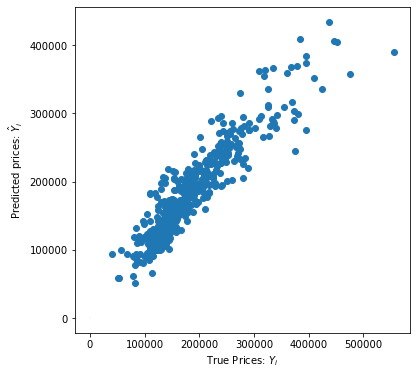

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.plot([0, 50], [0, 50], '--k')

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
# How well did it do on the training set
y_pred = lm.predict(X_train)

print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred)))
print('R squared: %.2f' % r2_score(y_train, y_pred))

Mean squared error: 26986.12
R squared: 0.87


In [62]:
# See how well it does on the test set
y_pred = lm.predict(X_test)

print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 28887.91
R squared: 0.85


# 6. Ridge & Lasso Regression

## 6.1. Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
#Ridge regression coefficients
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)
pred_train_ridge_reg= ridge_reg.predict(X_train)
print(pd.Series(ridge_reg.fit(X_train, y_train).coef_, index = X.columns))

OverallQual              9576.103043
GrLivArea                  50.404072
GarageCars               7928.191742
TotalBsmtSF                31.768249
BsmtQual_Ex             20443.909392
YearBuilt                 188.831826
KitchenQual_Ex          27517.139003
YearRemodAdd              253.572611
MasVnrArea                 11.491147
Fireplaces               9870.448268
ExterQual_Ex            43852.532750
ExterQual_Gd             7954.015800
BsmtFinType1_GLQ        13532.933062
Neighborhood_NridgHt     2362.695136
dtype: float64


In [65]:
# How well did it do on the training set
print("Mean squared error - Training set: %.2f" % np.sqrt(mean_squared_error(y_train, pred_train_ridge_reg)))
print('R squared - Training set: %.2f' % r2_score(y_train, pred_train_ridge_reg))

Mean squared error - Training set: 26986.68
R squared - Training set: 0.87


In [66]:
# How well it does on the test set
pred_test_ridge_reg= ridge_reg.predict(X_test)
print("Mean squared error - Test set:: %.2f" % np.sqrt(mean_squared_error(y_test, pred_test_ridge_reg)))
print('R squared - Test set: %.2f' % r2_score(y_test, pred_test_ridge_reg))

Mean squared error - Test set:: 28859.79
R squared - Test set: 0.85


## 6.2. Lasso Regression

In [67]:
from sklearn.linear_model import Lasso

In [68]:
#Lasso regression coefficients
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
pred_train_lasso= lasso_reg.predict(X_train)
print(pd.Series(lasso_reg.fit(X_train, y_train).coef_, index = X.columns))

OverallQual              9513.001985
GrLivArea                  50.366729
GarageCars               7940.539976
TotalBsmtSF                31.666653
BsmtQual_Ex             20423.404199
YearBuilt                 188.175523
KitchenQual_Ex          27576.146253
YearRemodAdd              251.908946
MasVnrArea                 11.327292
Fireplaces               9899.715270
ExterQual_Ex            45082.361052
ExterQual_Gd             8227.045692
BsmtFinType1_GLQ        13561.912694
Neighborhood_NridgHt     2167.135317
dtype: float64


In [69]:
# How well did it do on the training set
print("Mean squared error - Training set: %.2f" % np.sqrt(mean_squared_error(y_train, pred_train_lasso)))
print('R squared - Training set: %.2f' % r2_score(y_train, pred_train_lasso))

Mean squared error - Training set: 26986.12
R squared - Training set: 0.87


In [70]:
# How well it does on the test set
pred_test_lasso= lasso_reg.predict(X_test)
print("Mean squared error - Test set:: %.2f" % np.sqrt(mean_squared_error(y_test, pred_test_lasso)))
print('R squared - Test set: %.2f' % r2_score(y_test, pred_test_lasso))

Mean squared error - Test set:: 28887.90
R squared - Test set: 0.85


In [ ]:
#In general we the three models performed similarly. We ran the test under different scenarios, like dropping al NAs values, relaxing correlation thresholds
#or without removing the high P-values features and in all cases we got an R-squared for the test sample above 0.80. We belive that our models are reliable predictors
#for this data sample, given the features provided.

In [607]:
##############################################################################

# Question 2: Titanic Classification

## Team Members:

#### Marcel Santos de Carvalho, id 79083
#### Loris Baudry, id 79794
#### Alex Palacios, id 73713

#### Responsible for this notebook: Marcel Santos de Carvalho

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
%matplotlib inline
warnings.filterwarnings('ignore')

# 1. Load the data

In [613]:
df = pd.read_csv('IntroToML_Coursework_one/titanic/train.csv')

# 2. Visualise and analyse the data

In [614]:
type(df)

pandas.core.frame.DataFrame

In [615]:
df.shape

(891, 12)

In [616]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [617]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.1 Histograms

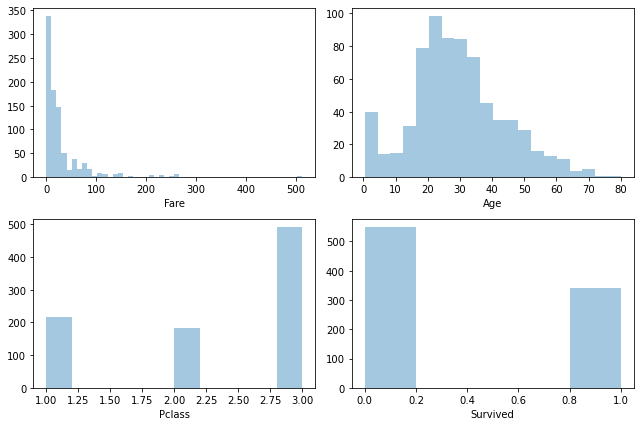

In [619]:
df_hist = df[['Fare', 'Age', 'Pclass', 'Survived']]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 6))
index=0
ax = ax.flatten()

for col, values in df_hist.items():
    sns.distplot(values, ax=ax[index], kde=False)
    index += 1
plt.tight_layout()

### 2.2 Survivors by feature

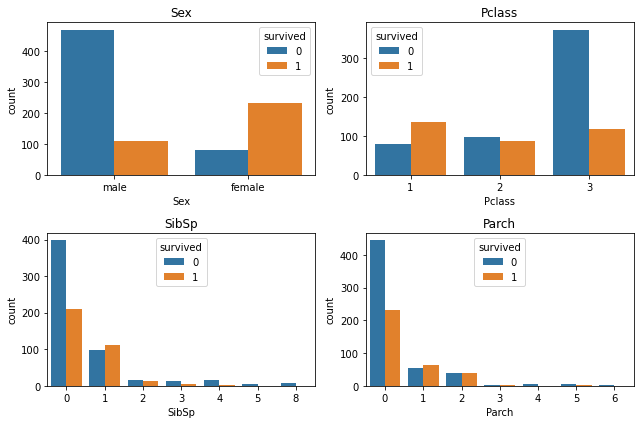

In [620]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch']
nrows = 2
ncols = 2

fig, axs = plt.subplots(nrows, ncols, figsize = (9, 6))

for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c # i goes through the columns
        ax = axs[r][c] # positioning in subplots
        sns.countplot(df[cols[i]], hue=df['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived')
plt.tight_layout()

### 2.3 Percentage survived by sex

Text(0.5, 0, 'Percentage of Survivors')

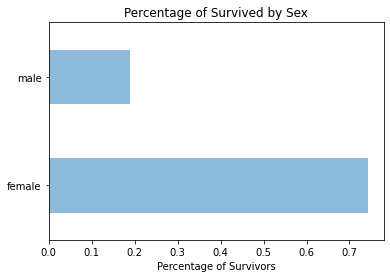

In [621]:
# Since we belive that 'Sex' is an important feature to analyse the label, we will look at percentage of survived by sex
df_survived = df[df.Survived == 1]

plt.title("Percentage of Survived by Sex")
numer = df_survived.Sex.value_counts().sort_index()
denom = df.Sex.value_counts().sort_index()
(numer/denom).plot(kind='barh', alpha=0.5)
plt.xlabel("Percentage of Survivors")

### 2.4 Percentage survived by Class

Text(0.5, 0, 'Percentage of Survivors')

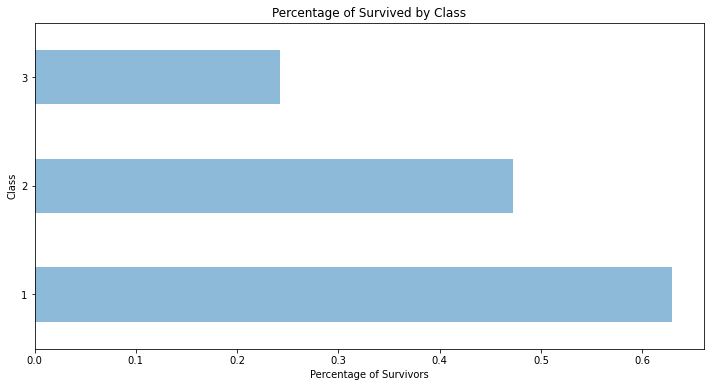

In [622]:
# Since we belive that 'Pclass' is an important feature to analyse the label, we will look at percentage of survived by class
plt.figure(figsize=(12, 6))
plt.title("Percentage of Survived by Class")
numer2 = df_survived.Pclass.value_counts().sort_index()
denom2 = df.Pclass.value_counts().sort_index()
(numer2/denom2).plot(kind='barh', alpha=0.5)
plt.ylabel("Class")
plt.xlabel("Percentage of Survivors")

In [623]:
# Conclusions: 

# We have a data frame with 891 samples, 11 features and 1 label
# We can already spot problems with features 'Age', 'Cabin', 'Embarked'

# Proportionally, women survived more than man
# Porportionally, higher classes (1 being highest) survived more than lower classes (3 being lowest)

# 3. Objective and methodology

In [624]:
# Our aim is to predict the 'survived' column

# We will approach this by:
## (i) Handling categorical and other data
## (ii) Looking for missing data and other issues
## (iii) Visualising and looking for outliers in the data
## (iv) Splitting the data into a 33%/67% train/split
## (v) Using a logistic regression, KNN, decision tree and SVM model to see which performs best
## (vi) Removing one feature at a time and seeing its effect

# 4. Handle categorical and other data

### 4.1 'Embarked' feature

In [625]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [626]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [627]:
emb_mapping = {'S':1, 'C':2, 'Q':3}
df['EmbMap'] = df.Embarked.map(emb_mapping)
df.drop('Embarked', axis=1, inplace=True)

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  EmbMap  
0      0         A/5 21171   7.2500   NaN     1.0  
1      0          PC 17599  71.2833   C85     2.0  
2      0  STON/O2. 3101282   7.9250   NaN     1.0  
3      0            113803  53.1000  C123     1.0  
4      0            373450   8.0500   NaN     1.0

### 4.2 'Sex' Feature

In [628]:
sex_mapping = {'male':0, 'female':1}
df['SexMap'] = df.Sex.map(sex_mapping)
df.drop('Sex', axis=1, inplace=True)

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  EmbMap  SexMap  
0         A/5 21171   7.2500   NaN     1.0       0  
1          PC 17599  71.2833   C85     2.0       1  
2  STON/O2. 3101282   7.9250   NaN     1.0       1  
3            113803  53.1000  C123     1.0       1  
4            373450   8.0500   NaN     1.0       0

# 5. Look for missing data and other issues

### 5.1 Missing data in 'Cabin'

In [629]:
# The feature cabin seems to replicate the info in Pclass, given that only higher class passengers have cabins
# Therefore, we are dropping this feature

df.drop('Cabin', axis=1, inplace=True)

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  EmbMap  SexMap  
0         A/5 21171   7.2500     1.0       0  
1          PC 17599  71.2833     2.0       1  
2  STON/O2. 3101282   7.9250     1.0       1  
3            113803  53.1000     1.0       1  
4            373450   8.0500     1.0       0

### 5.2 Missing data in 'Age'

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   EmbMap       889 non-null    float64
 10  SexMap       891 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [631]:
# We will fill the na data in Age with the average age

averageAge = df['Age'].mean()
averageAge

29.69911764705882

In [632]:
# Checking the average age of survivors to see if there is any significant difference

df_survived['Age'].mean()

28.343689655172415

In [633]:
# There is no significant difference, so we assign the mean to the missing data using .fillna

df['Age'] = df['Age'].fillna(averageAge)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   EmbMap       889 non-null    float64
 10  SexMap       891 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


### 5.3 Missing data in EmbMap

In [634]:
# We have 2 missing data in EmbMap.

## Since it is only 2 samples, we can simply drop these rows from df

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   EmbMap       889 non-null    float64
 10  SexMap       889 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 83.3+ KB


### 5.4 Standarizing the 'Age' and 'Fare' feature

In [635]:
type(df.Age.values)

numpy.ndarray

In [636]:
df.Age.values.shape

(889,)

<AxesSubplot:>

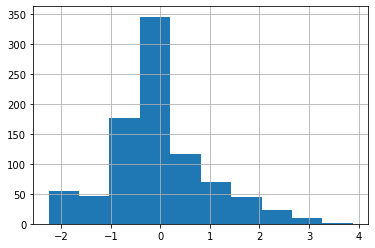

In [637]:
from sklearn.preprocessing import StandardScaler
df['AgeSD'] = StandardScaler().fit_transform(df.Age.values.reshape(-1,1))
df.drop('Age', axis=1, inplace=True)

df.AgeSD.hist()

In [638]:
type(df.Fare.values)

numpy.ndarray

In [639]:
df.Fare.values.shape

(889,)

<AxesSubplot:>

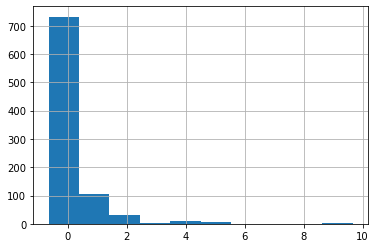

In [640]:
from sklearn.preprocessing import StandardScaler
df['FareSD'] = StandardScaler().fit_transform(df.Fare.values.reshape(-1,1))
df.drop('Fare', axis=1, inplace=True)

df.FareSD.hist()

### 5.5 Removing other redundant features

In [641]:
# We will drop the 'Name', 'PassengerId' and 'Ticket' for they will not help in our analysis

In [642]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['PassengerId'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)

# 6. Visualise the data and look for outliers to remove

In [643]:
df

Survived  Pclass  SibSp  Parch  EmbMap  SexMap     AgeSD    FareSD
0           0       3      1      0     1.0       0 -0.590495 -0.500240
1           1       1      1      0     2.0       1  0.643971  0.788947
2           1       3      0      0     1.0       1 -0.281878 -0.486650
3           1       1      1      0     1.0       1  0.412509  0.422861
4           0       3      0      0     1.0       0  0.412509 -0.484133
..        ...     ...    ...    ...     ...     ...       ...       ...
886         0       2      0      0     1.0       0 -0.204724 -0.384475
887         1       1      0      0     1.0       1 -0.821957 -0.042213
888         0       3      1      2     1.0       1  0.003524 -0.174084
889         1       1      0      0     2.0       0 -0.281878 -0.042213
890         0       3      0      0     3.0       0  0.181046 -0.490173

[889 rows x 8 columns]

In [644]:
# Reordering columns for organization

df = df[['FareSD', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD', 'Survived']]

<AxesSubplot:>

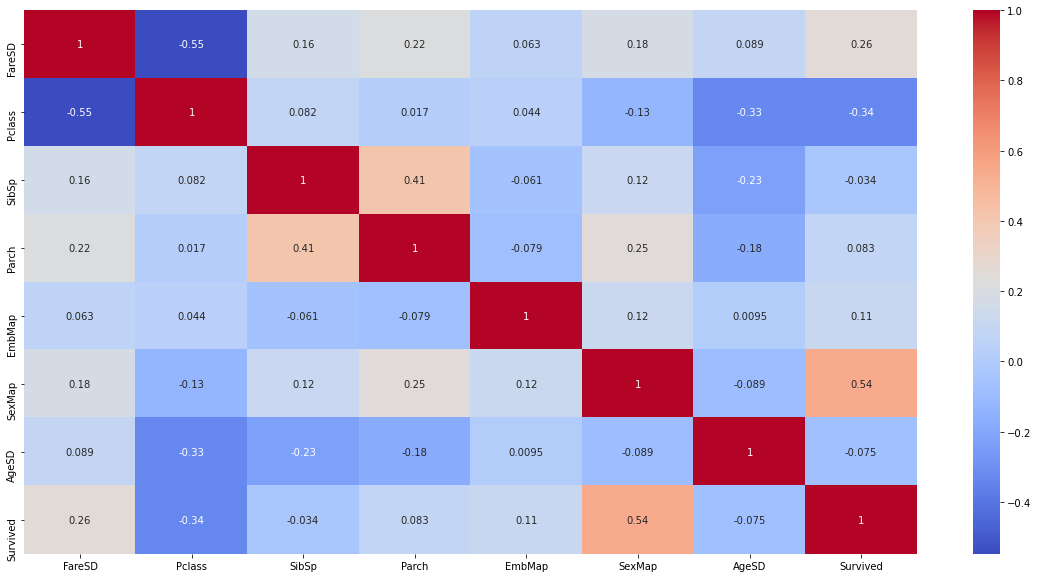

In [645]:
## Plot a correlation matrix to see the correlations between (i) features x label and (ii) features x features

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [646]:
# Brief analysis of correlation matrix:

## As we can observe, 'SexMap' and 'Pclass' are the most relevant features to determine who survived
## Note that 'FareSD' also has a relatively high correlation with the label, but it also has a high correlation with 'Pclass'
### which indicates that part of the information provived by these features are duplicated
## We will maintain both for now and see how things go in step 9

# 7. Regression model and train/test split

### 7.1 Creating matrix X and vector y

In [647]:
X = df[['FareSD', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD']]
y = np.array(df['Survived'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FareSD  889 non-null    float64
 1   Pclass  889 non-null    int64  
 2   SibSp   889 non-null    int64  
 3   Parch   889 non-null    int64  
 4   EmbMap  889 non-null    float64
 5   SexMap  889 non-null    int64  
 6   AgeSD   889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 55.6 KB


In [648]:
y.shape

(889,)

### 7.2 Usefull functions from HelpFunctions

In [649]:
# We will use this function from 'HelpFunctions' to plot the confusion matrices
from sklearn.metrics import plot_confusion_matrix

def plot_cm(clf, X, y, labs):
    
    mpl.rcParams.update({'font.size': 16})
    cm = plot_confusion_matrix(clf, X, y, display_labels=labs,cmap=mpl.cm.Blues);

### 7.3 Defining the 'train' function

In [650]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=999)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Model Report')
    print('Accuracy: ', np.around(accuracy_score(y_test, y_pred),4))
    print('Precision: ', np.around(precision_score(y_test, y_pred),4))
    print('Recall: ', np.around(recall_score(y_test, y_pred),4))
    print('f1: ', np.around(f1_score(y_test, y_pred),4))
    plot_cm(model, X, y, labs=('Not Survived', 'Survived'))

# 8. Choosing the best classification model

### 8.1 Logistic Regression

Model Report
Accuracy:  0.7925
Precision:  0.699
Recall:  0.7059
f1:  0.7024


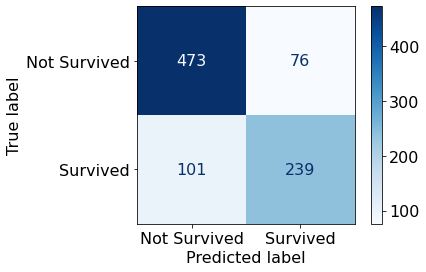

In [651]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
train(model, X, y)

### 8.2 KNN

Model Report
Accuracy:  0.8027
Precision:  0.7292
Recall:  0.6863
f1:  0.7071


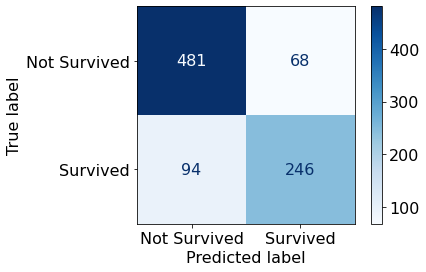

In [652]:
from sklearn.neighbors import KNeighborsClassifier

k=9  # We tested odd k's from 3 to 31, 9 resulted in the best accuracy and precision metrics
model = KNeighborsClassifier(k)
train(model, X, y)

### 8.3 Decision Tree

Model Report
Accuracy:  0.8231
Precision:  0.7717
Recall:  0.6961
f1:  0.732


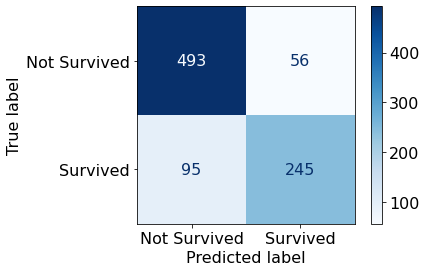

In [653]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from os import system
from graphviz import Source
from IPython.display import SVG

model = DecisionTreeClassifier(random_state=1, max_depth=3)
train(model, X, y)

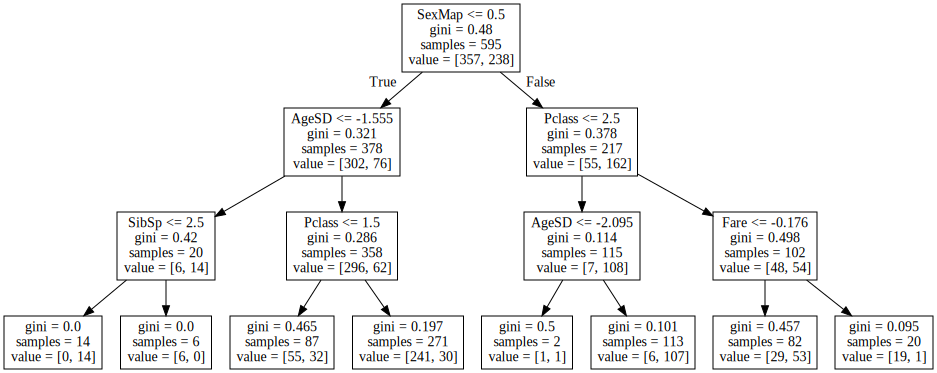

In [654]:
graph = Source(export_graphviz(model, out_file=None, feature_names=['Fare', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD']))
SVG(graph.pipe(format='svg'))

### 8.4 SVM

Model Report
Accuracy:  0.7959
Precision:  0.7283
Recall:  0.6569
f1:  0.6907


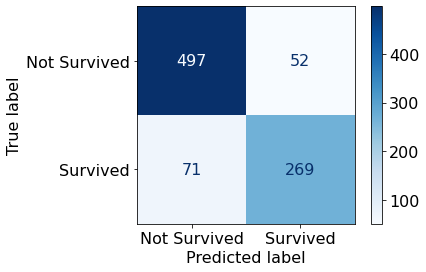

In [655]:
from sklearn.svm import SVC

model = SVC(kernel='poly', coef0 = 1, C=10000)
train(model, X, y)

### 8.5 Comparing and choosing final model

In [656]:
L = {'Logistic Regression':[0.7925,0.699, 0.7059, 0.7024], 'KNN':[0.8027,0.7292, 0.6863, 0.7071], 'Decision Tree':[0.8231,0.7717, 0.6961, 0.732], 'SVM':[0.7959,0.7283, 0.6569, 0.6907]}

df_results = pd.DataFrame(L, index=['Accuracy', 'Precision', 'Recall', 'F1'])

df_results

Logistic Regression     KNN  Decision Tree     SVM
Accuracy                0.7925  0.8027         0.8231  0.7959
Precision               0.6990  0.7292         0.7717  0.7283
Recall                  0.7059  0.6863         0.6961  0.6569
F1                      0.7024  0.7071         0.7320  0.6907

In [657]:
# Conclusion:

## As can be observed in the DataFrame above, the Decision Tree model outperformed the three other models in all 4 metrics analysed, with the expection of Recall with Logistic Regression
## Therefore, we will continue our analysis using the Decision Tree

# 9. Removing features and re-training model

In [658]:
## We will remove one feature at a time and re-training the Decision Tree

In [659]:
# We will name the new feature matrices by highlighting the removed feature
## Example: 'X_FareSD' is matrice X without the feature 'FareSD'

X_FareSD = X.drop(['FareSD'], axis=1)
X_Pclass = X.drop(['Pclass'], axis=1)
X_SibSp = X.drop(['SibSp'], axis=1)
X_Parch = X.drop(['Parch'], axis=1)
X_EmbMap = X.drop(['EmbMap'], axis=1)
X_SexMap = X.drop(['SexMap'], axis=1)
X_AgeSD = X.drop(['AgeSD'], axis=1)

L_X = [X, X_FareSD, X_Pclass, X_SibSp, X_Parch, X_EmbMap, X_SexMap, X_AgeSD]
L_f = ['All', 'FareSD', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD']

In [660]:
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])

In [661]:
def train_2(model, X, y, name='Feature'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=999)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    stats = [np.around(accuracy_score(y_test, y_pred),4),np.around(precision_score(y_test, y_pred),4),
        np.around(recall_score(y_test, y_pred),4), np.around(f1_score(y_test, y_pred),4)]
    results[name] = stats

In [662]:
model = DecisionTreeClassifier(random_state=1, max_depth=3)

In [663]:
i = 0
for _ in range(0, len(L_X)):
    train_2(model, L_X[_], y, name = L_f[i])    
    i = i + 1
    
results

All  FareSD  Pclass   SibSp   Parch  EmbMap  SexMap   AgeSD
Accuracy   0.8231  0.8435  0.8197  0.8129  0.8231  0.8231  0.7041  0.8095
Precision  0.7717  0.8889  0.7579  0.7640  0.7717  0.7717  0.7273  0.7614
Recall     0.6961  0.6275  0.7059  0.6667  0.6961  0.6961  0.2353  0.6569
F1         0.7320  0.7356  0.7310  0.7120  0.7320  0.7320  0.3556  0.7053

In [664]:
# Conclusion:

# The results shown in the DataFrame above are very interesting.
## We can interpret that the lower the metrics when the feature is removed, the more important the feature is.
## That is because without that feature our model works more poorly.

# 'Fare', 'Parch' and 'EmbMap'
## We notice that when we took out 'EmbMap' and 'Parch' none of the metrcis changed
## This shows that, independently, those features don't help to predict the label
## When we removed 'Fare', the metrics actually improved
## This shows that that our prediction is improved disconsidering that feature, so we are going to drop it and re-train the results


In [665]:
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])

X.drop(['FareSD'], axis=1, inplace=True)

X_Pclass = X.drop(['Pclass'], axis=1)
X_SibSp = X.drop(['SibSp'], axis=1)
X_Parch = X.drop(['Parch'], axis=1)
X_EmbMap = X.drop(['EmbMap'], axis=1)
X_SexMap = X.drop(['SexMap'], axis=1)
X_AgeSD = X.drop(['AgeSD'], axis=1)

L_X = [X, X_Pclass, X_SibSp, X_Parch, X_EmbMap, X_SexMap, X_AgeSD]
L_f = ['All', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD']

In [666]:
i = 0
for _ in range(0, len(L_X)):
    train_2(model, L_X[_], y, name = L_f[i])    
    i = i + 1
    
results

All  Pclass   SibSp   Parch  EmbMap  SexMap   AgeSD
Accuracy   0.8435  0.8197  0.8333  0.8435  0.8197  0.7279  0.8265
Precision  0.8889  0.7579  0.8841  0.8889  0.7816  0.6618  0.8493
Recall     0.6275  0.7059  0.5980  0.6275  0.6667  0.4412  0.6078
F1         0.7356  0.7310  0.7135  0.7356  0.7196  0.5294  0.7086

In [667]:
# Now we see that when we remove Parch the results don't change, so we drop it and retrain the model

In [668]:
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])

X.drop(['Parch'], axis=1, inplace=True)

X_Pclass = X.drop(['Pclass'], axis=1)
X_SibSp = X.drop(['SibSp'], axis=1)
X_EmbMap = X.drop(['EmbMap'], axis=1)
X_SexMap = X.drop(['SexMap'], axis=1)
X_AgeSD = X.drop(['AgeSD'], axis=1)

L_X = [X, X_Pclass, X_SibSp, X_EmbMap, X_SexMap, X_AgeSD]
L_f = ['All', 'Pclass', 'SibSp', 'EmbMap', 'SexMap', 'AgeSD']

i = 0
for _ in range(0, len(L_X)):
    train_2(model, L_X[_], y, name = L_f[i])    
    i = i + 1
    
results

All  Pclass   SibSp  EmbMap  SexMap   AgeSD
Accuracy   0.8435  0.8231  0.8333  0.8231  0.7279  0.8299
Precision  0.8889  0.7604  0.8841  0.8125  0.6618  0.8824
Recall     0.6275  0.7157  0.5980  0.6373  0.4412  0.5882
F1         0.7356  0.7374  0.7135  0.7143  0.5294  0.7059

In [669]:
## Since the weight of importance between false positives and false negatives is equal in this analysis we wil classify importance using 'Accuracy' score.

# Importance Hierarchy of features:
## SexMap
## AgeSD
## Pclass
## EmbMap
## SibSp

In [670]:
########################################################################

# Question 3: Wisconsin Cancer


## Team Members:

#### Marcel Santos de Carvalho, id 79083
#### Loris Baudry, id 79794
#### Alex Palacios, id 73713

#### Responsible for this notebook: Loris Baudry

In [671]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# 1.- Data import

In [672]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

# 2.- Data Visualization and Analysis

## 2.1 Data Description

The Breast Cancer Dataset is comprised by 569 observations of 30 features and 2 labels. The classes are Malignant (0) and Bening (1). From the 30 features, all of them are numerical and there is no missing date in any of the features observations. Nonetheless, the scale of some features largly differs so we will standardize the features magnitude with the MinMax Scaling Method.  

In [673]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [674]:
x=pd.DataFrame(data.data)

In [675]:
x.shape

(569, 30)

In [676]:
x.head()

0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 30 columns]

In [677]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [678]:
x.columns=data.feature_names

In [679]:
x.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [680]:
y=data.target

In [681]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [682]:
print(data.target_names)

['malignant' 'benign']


In [683]:
types = []
for i in y:
    name = data['target_names'][i]
    types.append(name)

In [684]:
x['types'] = types

In [685]:
x.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension      types  
0          0.4601                  0.11890  malignant  
1          0.2750                  0.08902  malignant  
2          0.3613                  0.08758  malignant  
3          0.6638                  0.17300  malignant  
4          0.2364                  0.07678  malignant  

[5 rows x 31 columns]

In [686]:
x.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension      types  
564                0.2216          0.2060                  0.07115  malignant  
565                0.1628          0.2572                  0.06637  malignant  
566                0.1418          0.2218                  0.07820  malignant  
567                0.2650          0.4087                  0.12400  malignant  
568                0.0000          0.2871                  0.07039     benign  

[5 rows x 31 columns]

In [687]:
x.isna().count()

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
types                      569
dtype: int64

In [688]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2.1 Feature Standardadization

We chose 4 randome feautres to show the difference in the scale of the features and how the MinMa Scaling method helped us to fix that problem by replotting the rescaled features

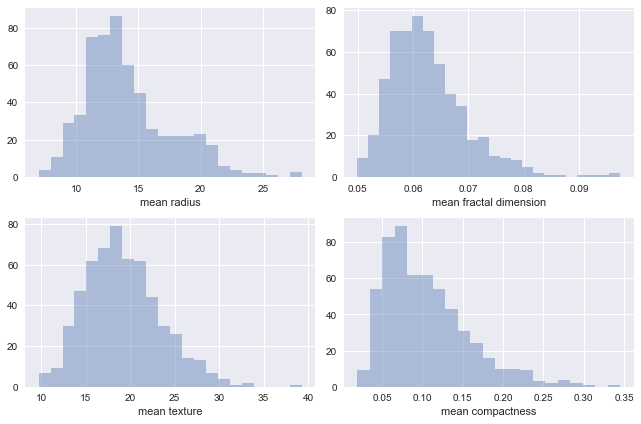

In [689]:
import seaborn as sns
x_hist = x[['mean radius', 'mean fractal dimension', 'mean texture', 'mean compactness']]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 6))
index=0
ax = ax.flatten()

for col, values in x_hist.items():
    sns.distplot(values, ax=ax[index], kde=False)
    index += 1
plt.tight_layout()

In [690]:
from sklearn.preprocessing import MinMaxScaler
x.iloc[:,0:-1] = MinMaxScaler().fit_transform(x.iloc[:,0:-1])

In [691]:
x.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                0.605518  ...       0.141525         0.668310    0.450698   
1                0.141323  ...       0.303571         0.539818    0.435214   
2                0.211247  ...       0.360075         0.508442    0.374508   
3                1.000000  ...       0.385928         0.241347    0.094008   
4                0.186816  ...       0.123934         0.506948    0.341575   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0          0.601136           0.619292         0.568610              0.912027   
1          0.347553           0.154563         0.192971              0.639175   
2          0.483590           0.385375         0.359744              0.835052   
3          0.915472           0.814012         0.548642              0.884880   
4          0.437364           0.172415         0.319489              0.558419   

   worst symmetry  worst fractal dimension      types  
0        0.598462                 0.418864  malignant  
1        0.233590                 0.222878  malignant  
2        0.403706                 0.213433  malignant  
3        1.000000                 0.773711  malignant  
4        0.157500                 0.142595  malignant  

[5 rows x 31 columns]

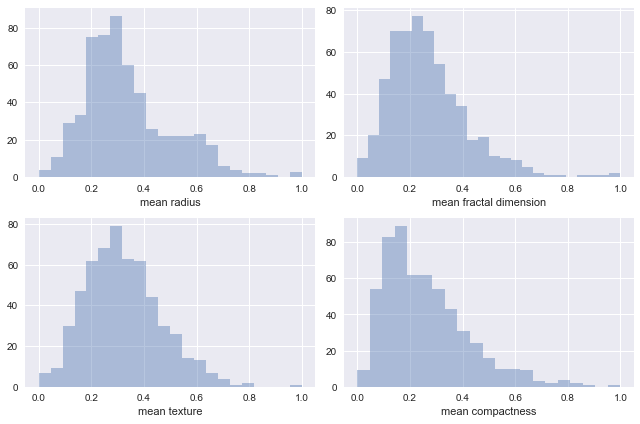

In [692]:
x_hist = x[['mean radius', 'mean fractal dimension', 'mean texture', 'mean compactness']]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 6))
index=0
ax = ax.flatten()

for col, values in x_hist.items():
    sns.distplot(values, ax=ax[index], kde=False)
    index += 1
plt.tight_layout()

In [693]:
#from sklearn.preprocessing import StandardScaler
#x.iloc[:,0:-1] = StandardScaler().fit_transform(x.iloc[:,0:-1])
#x["mean radius"].hist()

In [694]:
#x.head()

# 3.- Explanatory Power Analysis

## 3.1 Correlations Analysis and P-values

As part of the data analysis, we will look for hihgly correlated features as having multicollinearity implies that there might be some regressors not adding much information to the model. We will try to idenify those variables that seem not to have high explanatory power and to create a second sample set without them. For the remaining of the work we will do each analysis with two samples to compare the results

<AxesSubplot:>

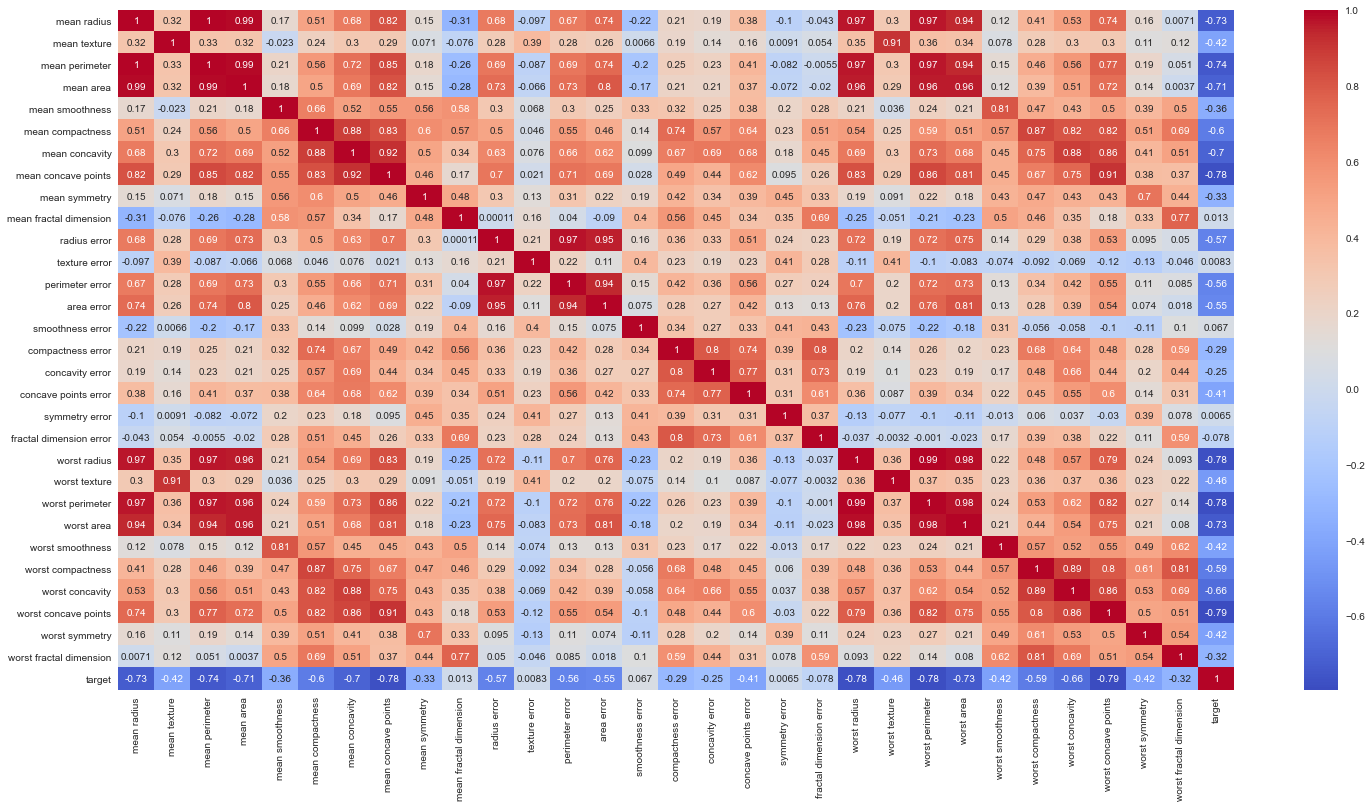

In [695]:
## Plot a correlation matrix to see the correlations between (i) features x label and (ii) features x features
x['target']=y
import seaborn as sns
corr = x.corr()
plt.figure(figsize=(25,12.5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the correlation matrix is easy to see that some variables are hihgly correlated and others have veyr low correlation regarding the targe variable:

    1.- Mean Perimeter, mean area, worst radius, worst perimeter and worst area are highly correlated with mean radius
    2.- Worst texture is highly correlated with mean texture
    3.- Mean concavity is highly correlated with mean concave points
    4.- Worst concave points is highly correlated with mean concave points
    5.- Perimeter error and area error are highly correlated with radius error
    6.- Perimeter error is highly correlate with area error
    7.- Worst perimeter and worst area are highly correlated with worst radius
    8.- Worst area is highly correlated with worst perimeter
    9.- Mean fractal dimension, texture error, smoothness error, symmetry error, fractal dimension error, have very low correlation with target.
    
 Let us see how the correlation matrix shows after removing the following features:
     - Mean concave points, mean texture, perimeter error, area error, worst perimeter, worst area, mean perimeter, mean area, worst radius, worst perimeter and worst area, mean fractal dimension, texture error, smoothness error, symmetry error, fractal dimension error 
    

In [696]:
x1=x.drop(["mean concave points", "mean texture", "perimeter error", "area error", "worst perimeter", "worst area", "mean perimeter", "mean area", "worst radius", "worst perimeter", "worst area", "mean fractal dimension", "texture error", "smoothness error", "symmetry error", "fractal dimension error"],axis=1)
x1.shape

(569, 18)

<AxesSubplot:>

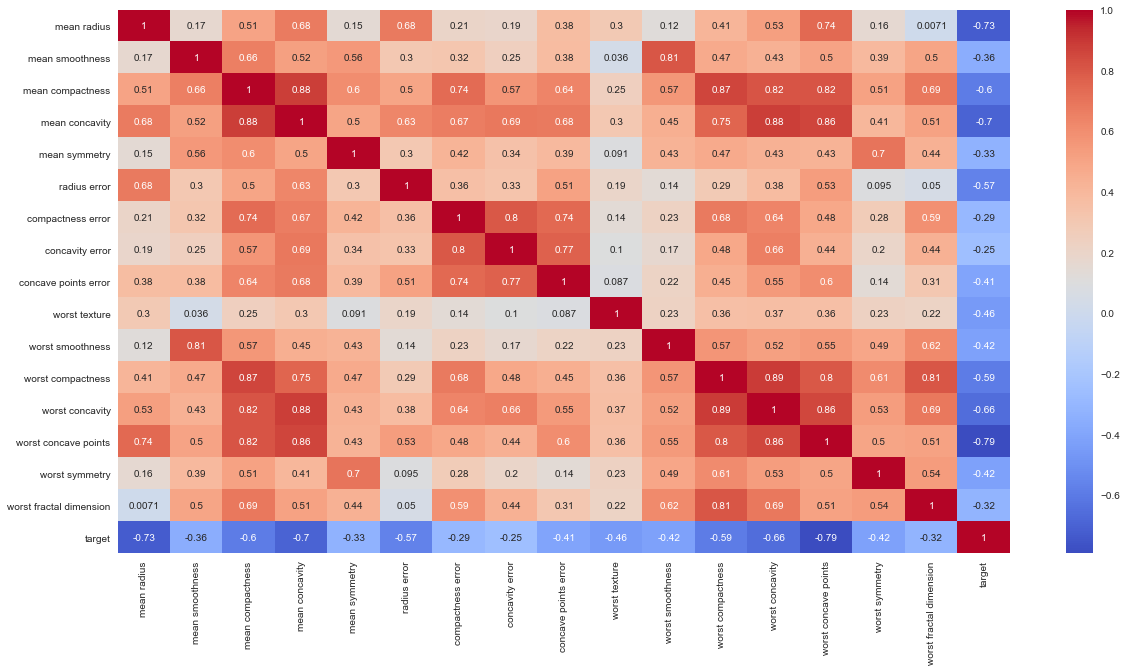

In [697]:
corr = x1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

We also compute the p-values of the regressors. Noramlly, a p-value higher than 5% (the common significance level) means that the regressor coefficient is not statistically different from zero. In other words, you could erase that regressor. From the analysis below, it seems that "mean compactness", "concavity error", "worst area" and "worst radius" are the variables with the highest explanatory power.Nevertheless, we won't be erasing the features with hihg p-values as would have very little features to work on.

In [699]:
import statsmodels.api as sm
xt=x.drop(["types","target"],axis=1)
xt2= sm.add_constant(xt)
est = sm.OLS(y, xt2,hasconstant=True)
est2 = est.fit()
print(est2.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          6.05e-153
Time:                        10:28:47   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## 3.2 Features distribution by class

We will create a distribution plot to see how differentiated are each feature in term of the labels, this will also give us an idea of which features my have higher explanatory power such as mean perimeter. Even though, in the middle of the plot there is no celar difference between classes, this feature is clearly differentiated at the limits of the x-axis

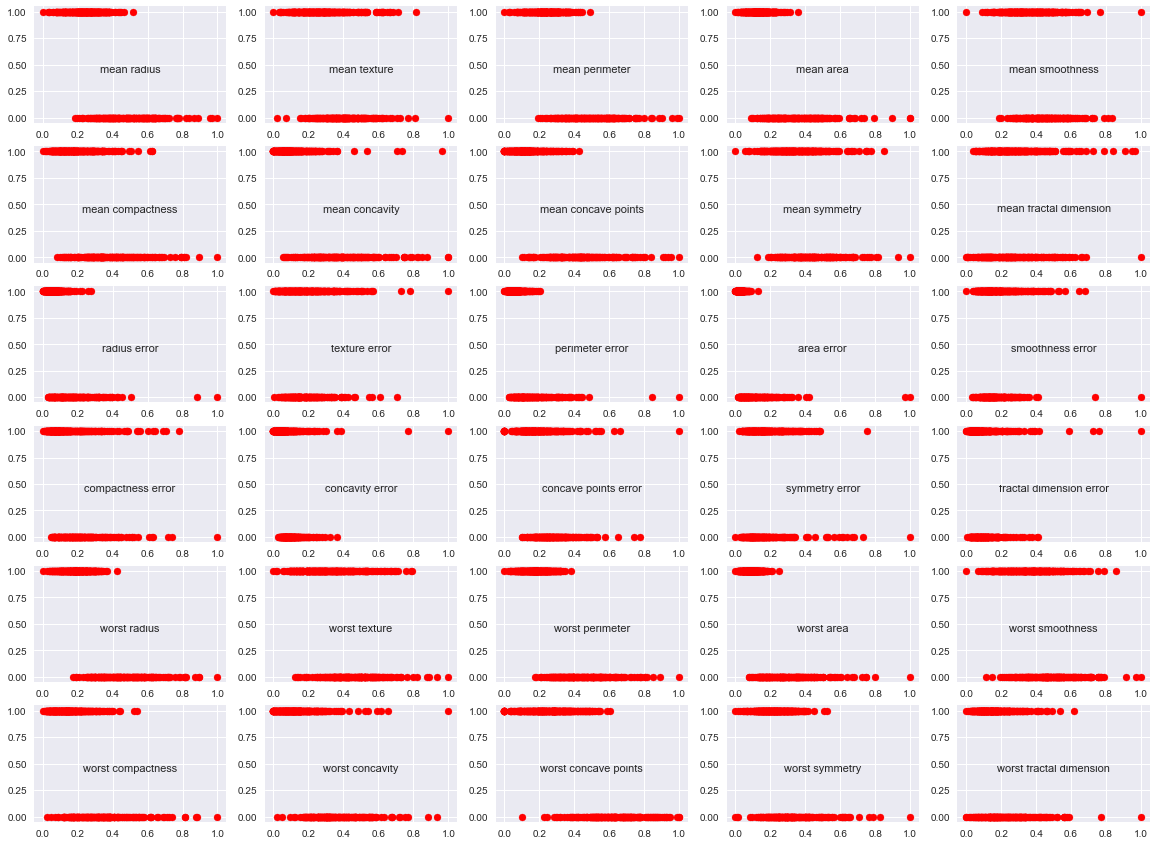

In [700]:
plt_idx = 1
plt.figure(figsize=(20, 15))

for index1 in range(0,30):
        f1 = x.columns[index1]
        xp = x[f1]
        plt.subplot(6,5,plt_idx,label=f1)
        plt.scatter(xp,y,c = 'red')
        plt.xlabel(f1,labelpad=-75)
        plt_idx = plt_idx+1

# 4.- Metrics for model evaluation 

For the model evaluation we will be using the next metrics:
    
$$Accuracy=\frac{TP+TN}{FP+FN+TP+TN}$$ 

    
$$Precision=\frac{TP}{TP+FP}$$    

    
$$Recall=\frac{TP}{TP+FN}$$    

    
$$F1=2\times\frac{Precision\times Recall}{Precision+Recall}$$

# 5.- Model Fitting

We will now fit different models to our data. We will apply each model twice. One for the original data and one for the second set in which we remove some variables. We will fit the model to a train set (70% of total data randomly selected) and then predict values for the rest 30%. The models we will aplly are Logistic Regression, K-Nearest Neighbor, Decision Tree and Supported Vector Machine

## 5.1 Logistic Regression

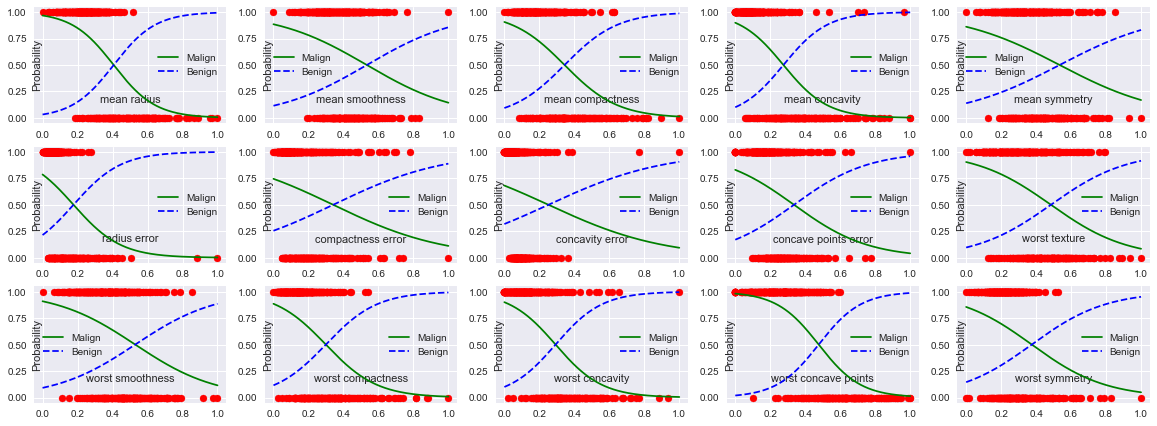

In [701]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
plt_idx = 1
plt.figure(figsize=(20, 15))

for index1 in range(0,15):
        f1 = x1.columns[index1]
        xp = x1[f1].values.reshape(569,1)
        log_reg.fit(xp,y)
        X_new = np.linspace(xp.min(),xp.max(),1000).reshape(-1,1)
        y_proba = log_reg.predict_proba(X_new)
        plt.subplot(6,5,plt_idx)
        plt.scatter(xp,y,c = 'red')
        plt.plot(X_new,y_proba[:,1],"g-",label="Malign",)
        plt.plot(X_new,y_proba[:,0],"b--",label="Benign")
        plt.xlabel(f1,labelpad=-45,loc='center')
        plt.ylabel('Probability',loc='center',labelpad=-35)
        plt.legend()
        plt_idx = plt_idx+1

After cleaning for high correlated variables, its easy to observe that some features do not have high explanatory power when isolated, as the classes ar not clearly differentiated. We will fit the model now with all the features at the same time.

We will define a function generation a confusion matrix, which has on the diagonal the correct prections to show graphically how well the model fit the data. Afterwards, there is a another function that we create so that the data are split between train and test set, the model is fit on the train set and the the metrics described before are applied to evaluate the model

In [702]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as mpl

def plot_cm(clf, X, y, labs):
    
    mpl.rcParams.update({'font.size': 16})
    cm = plot_confusion_matrix(clf, X, y, display_labels=labs,cmap=mpl.cm.Blues);

In [703]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def train(model, z, w):
    x_train, x_test, y_train, y_test = train_test_split(z, w, test_size=.30, random_state=999)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print('Model Report')
    print('Accuracy: ', np.around(accuracy_score(y_test, y_pred,normalize=True),4))
    print('Precision: ', np.around(precision_score(y_test, y_pred),4))
    print('Recall: ', np.around(recall_score(y_test, y_pred),4))
    print('f1: ', np.around(f1_score(y_test, y_pred),4))
    plot_cm(model, x_test, y_test, labs=('Bening', 'Malign'))

### 5.1.1 Logistic regression full sample

Model Report
Accuracy:  0.9532
Precision:  0.9245
Recall:  1.0
f1:  0.9608


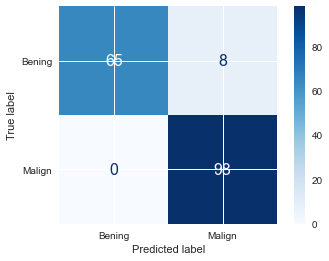

In [704]:
xt=x.drop(["types","target"],axis=1)
model = LogisticRegression(solver='liblinear')
train(model, xt, y)

### 5.1.2 Logistic regression subsample

Model Report
Accuracy:  0.9415
Precision:  0.9074
Recall:  1.0
f1:  0.9515


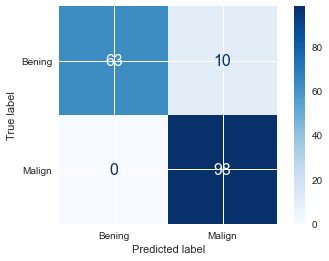

In [705]:
xt=x1.drop(["types","target"],axis=1)
model = LogisticRegression(solver='liblinear')
train(model, xt, y)

The results actually worsen after removing the selected variables, although not by much.

## 5.2 K-Nearest Neighbor

### 5.2.1 K-Nearest Neighbor full sample

In [706]:
from sklearn.neighbors import KNeighborsClassifier

Model Report
Accuracy:  0.9766
Precision:  0.97
Recall:  0.9898
f1:  0.9798


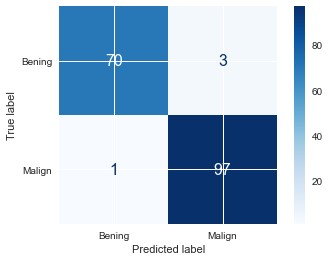

In [707]:
K=3
model = KNeighborsClassifier(K,p=2)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

#### 5.2.1.2 K variation analysis

We will see how the accuracy of our prediction changes as we vary the number of neighbors taken to fit the model

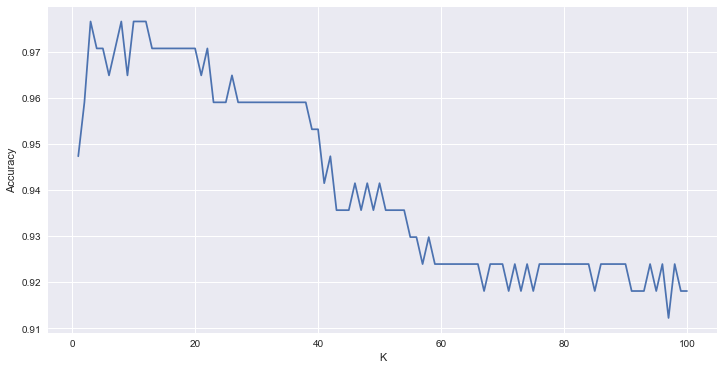

In [708]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

#### 5.2.1.2 Check Analysis
Is easy to see that when K=3 we reach the highest accuracy. We will now see how the graph changes when wee change the method to measure the distance. The first method used above was the Euclidean method (p=2). Now we will use the Manhattan method (p=1). Finally, we decided to use the Manhattan method as it reaches the highest accuracy. Now, we will corroborate that accuracy decays as k increases by fittign the model for different ks

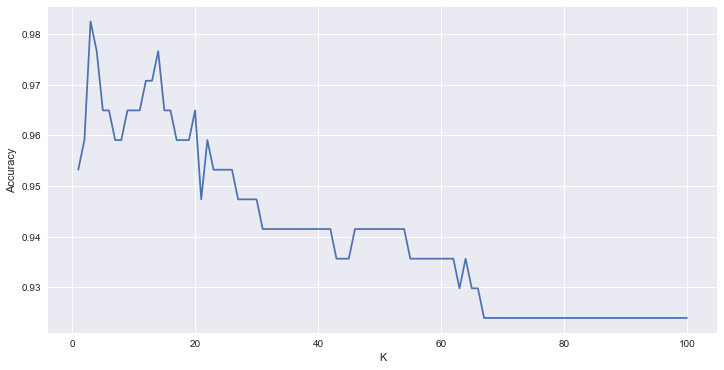

In [709]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

Model Report
Accuracy:  0.9825
Precision:  0.9703
Recall:  1.0
f1:  0.9849


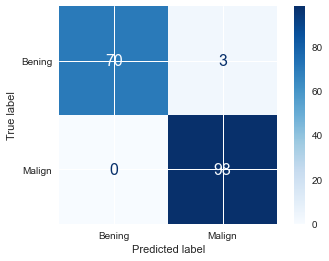

In [710]:
K=3
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9766
Precision:  0.97
Recall:  0.9898
f1:  0.9798


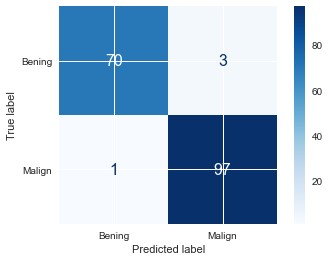

In [711]:
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.924
Precision:  0.8829
Recall:  1.0
f1:  0.9378


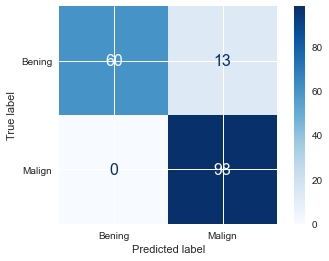

In [712]:
K=70
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

### 5.2.2 K-Nearest Neighbor subsample

Model Report
Accuracy:  0.9474
Precision:  0.9406
Recall:  0.9694
f1:  0.9548


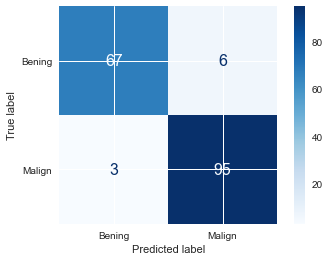

In [713]:
K=3
model = KNeighborsClassifier(K,p=2)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

#### 5.2.2.2 K variation analysis

We will see again how the accuracy of our prediction changes as we vary the number of neighbors taken to fit the model

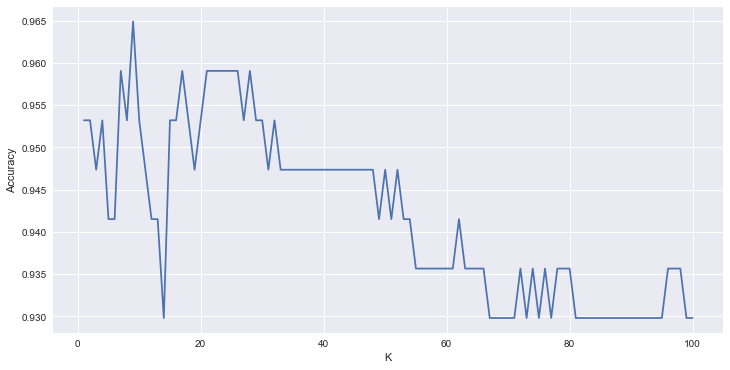

In [714]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x1.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=2)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

#### 5.2.1.2 Check Analysis
In this case, when K=3 we reach again the highest accuracy. We will repeat the same step before to seehow the graph changes when we change the method to measure the distance. In this case, we decided again to use the Manhattan method as it reaches the highest accuracy. Now, we will corroborate that accuracy decays as k increases by fittign the model for different ks

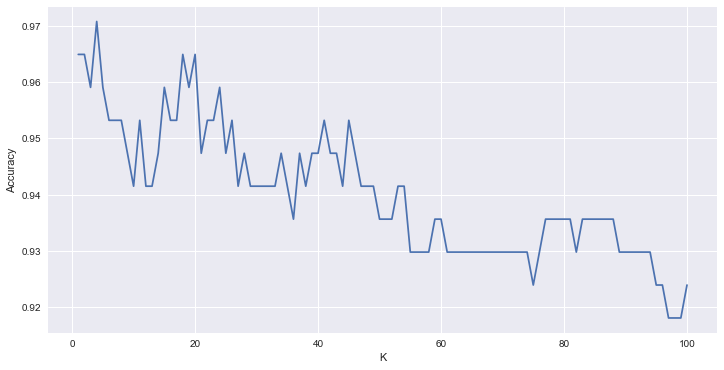

In [715]:
from sklearn.metrics import confusion_matrix
accs = []
ks = []
xt=x1.drop(["types","target"],axis=1)
for k in range(1,101,1):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=999)
    knn = KNeighborsClassifier(n_neighbors = k, p=1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = (cm[0][0]+cm[1][1])/len(y_test)
    ks.append(k)
    accs.append(acc)
    
plt.figure(figsize=(12, 6))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(ks,accs);

Model Report
Accuracy:  0.9649
Precision:  0.96
Recall:  0.9796
f1:  0.9697


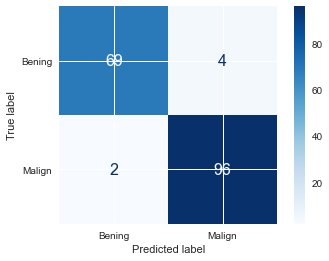

In [716]:
K=1
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9708
Precision:  0.9604
Recall:  0.9898
f1:  0.9749


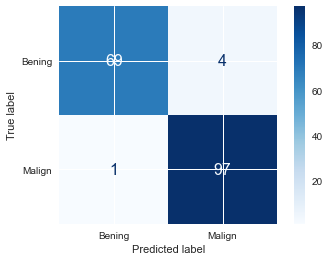

In [717]:
K=4
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9298
Precision:  0.8981
Recall:  0.9898
f1:  0.9417


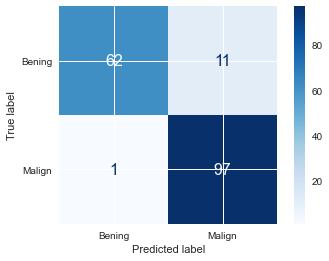

In [718]:
K=70
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Similarly as the logistic regression case, the metrics worsen after removing the selected variables but not in a significant way

## 5.3 Decision Tree

We will now fit the Decision Tree model, setting a maximum depth of ramifications. 

In [719]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

### 5.3.1 Decision Tree full sample

As we can see, all the final leafs have gini meausres equal to 0 meaning that the model has exactly fitted the data

Model Report
Accuracy:  0.924
Precision:  0.9126
Recall:  0.9592
f1:  0.9353


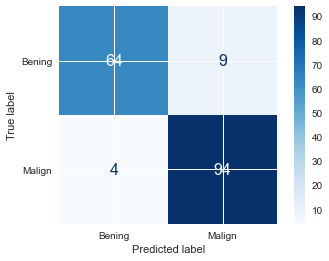

In [720]:
model = DecisionTreeClassifier(random_state=235, max_depth=10)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

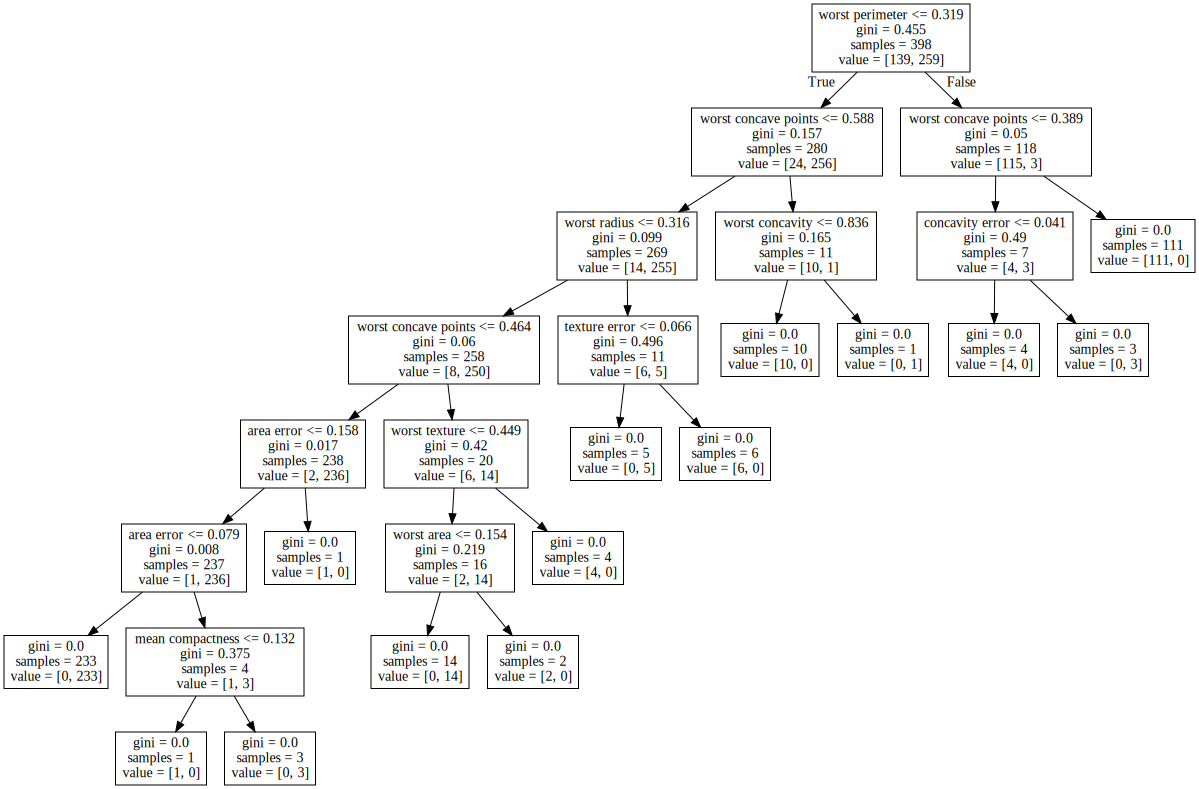

In [721]:
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(model, out_file=None, feature_names = xt.columns))
SVG(graph.pipe(format='svg'))

### 5.3.2 Decision Tree subsample

In this case, the gini metrics are all equal to zero in the final leafs, so the model fitted the data exacly again. In this case, the subsample actually allowed for an improvement in the perfomance measures, although they are still lower that the ones obtained in the previos two methods

Model Report
Accuracy:  0.9415
Precision:  0.9314
Recall:  0.9694
f1:  0.95


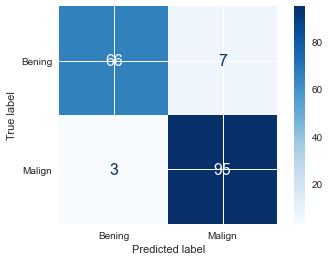

In [722]:
model = DecisionTreeClassifier(random_state=235, max_depth=10)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

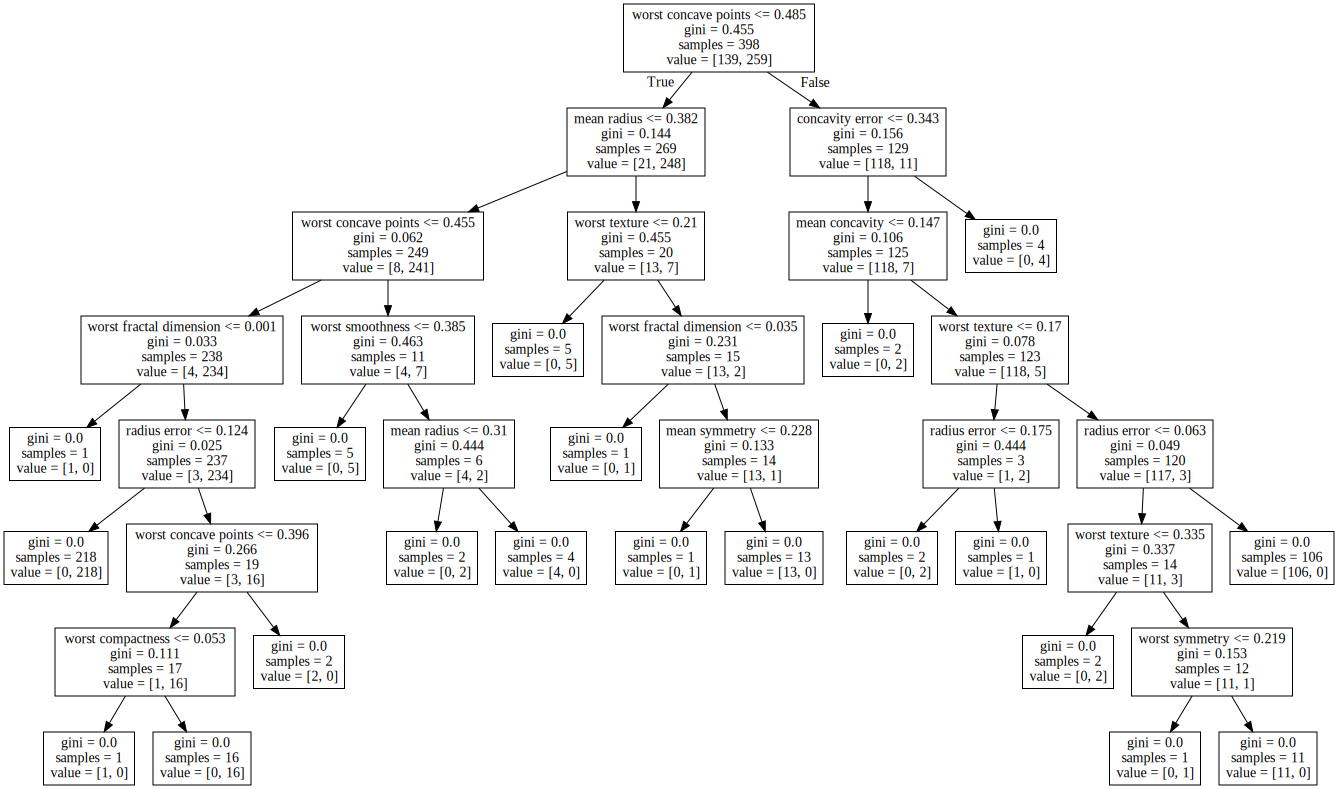

In [723]:
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(model, out_file=None, feature_names = xt.columns))
SVG(graph.pipe(format='svg'))

## 5.4 Support Vector Machines

In [724]:
from sklearn.svm import SVC

### 5.4.1 Support Vector Machines full sample

We will fit the model using a linear, radial basis and polynomial kernels (mapping methods)

Model Report
Accuracy:  0.9591
Precision:  0.9596
Recall:  0.9694
f1:  0.9645


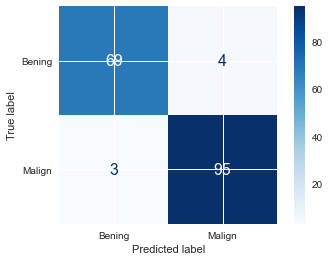

In [725]:
model = SVC(kernel = 'linear', C=1000)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9708
Precision:  0.9604
Recall:  0.9898
f1:  0.9749


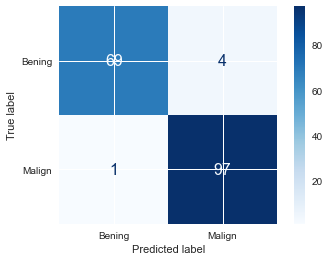

In [726]:
model = SVC(kernel = 'rbf', C=1000)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9591
Precision:  0.9505
Recall:  0.9796
f1:  0.9648


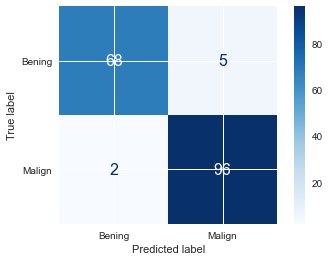

In [727]:
model = SVC(kernel = 'poly', C=1000)
xt=x.drop(["types","target"],axis=1)
train(model, xt, y)

The radial basis kernel yields the best metrics. Let us explore what happens when we dropped the selected variables

### 5.4.2 Support Vector Machines subsample

Model Report
Accuracy:  0.9474
Precision:  0.9406
Recall:  0.9694
f1:  0.9548


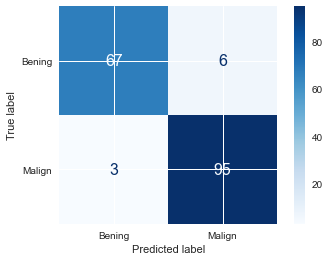

In [728]:
model = SVC(kernel = 'linear', C=1000)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.9649
Precision:  0.96
Recall:  0.9796
f1:  0.9697


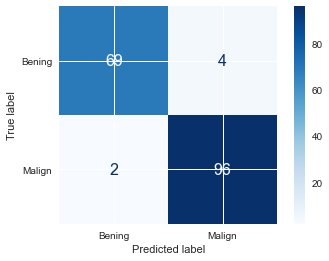

In [729]:
model = SVC(kernel = 'rbf', C=1000)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

Model Report
Accuracy:  0.924
Precision:  0.9208
Recall:  0.949
f1:  0.9347


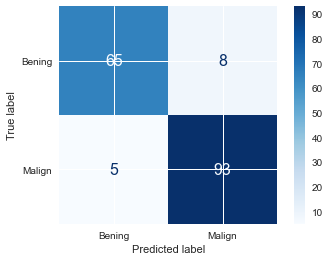

In [730]:
model = SVC(kernel = 'poly', C=1000)
xt=x1.drop(["types","target"],axis=1)
train(model, xt, y)

We obtained the same results, the radial basis kernel yields the best result. Also, the analysis is consistent with the logistic and the K-neares neighvor methods, as dropping the selected variables actually worsen the performance

# 6.- Identify the best method

For selecting the best method, we compily in one talbe the performance metrics for the best case in each method. The best method was the K-Nearest Neighbor with the Manhattan method and K=3 (full sample). The next better ones were the Logistic Regression and the Support Vector Machines with very little difference between them (full sample). Is interesting to see that the worst method was the one that actually performed better with the subsample. 

In [731]:
L = {'Logistic Regression':[0.9532,0.9245, 1.000, 0.9608], 'KNN':[0.9825,0.9703, 1.0000, 0.9849], 'Decision Tree':[0.9240,0.9126, 0.9592, 0.9353], 'SVM':[0.9708,0.9604, 0.9898, 0.9749]}

df_results = pd.DataFrame(L, index=['Accuracy', 'Precision', 'Recall', 'F1'])

df_results

Logistic Regression     KNN  Decision Tree     SVM
Accuracy                0.9532  0.9825         0.9240  0.9708
Precision               0.9245  0.9703         0.9126  0.9604
Recall                  1.0000  1.0000         0.9592  0.9898
F1                      0.9608  0.9849         0.9353  0.9749

# 7.- Variable significance analysis

We will perform the next analysis with the best model from the table above. We will remove one variable at a time and see how the performance measure of the model changes

In [732]:
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
def train_2(model, x, y, name='Feature'):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=999)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    stats = [np.around(accuracy_score(y_test, y_pred),4),np.around(precision_score(y_test, y_pred),4),
        np.around(recall_score(y_test, y_pred),4), np.around(f1_score(y_test, y_pred),4)]
    results[name] = stats

In [733]:
K=3
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target"],axis=1)
i = 0
for i in range(0, len(data.feature_names)):
    train_2(model, xt.drop(data.feature_names[i],axis=1), y, name = data.feature_names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

mean texture  worst texture  concave points error  mean radius  \
Accuracy         0.9708         0.9708                0.9708       0.9766   
Precision        0.9604         0.9697                0.9604       0.9700   
Recall           0.9898         0.9796                0.9898       0.9898   
F1               0.9749         0.9746                0.9749       0.9798   

           worst concavity  worst compactness  worst perimeter  worst radius  \
Accuracy            0.9766             0.9766           0.9766        0.9766   
Precision           0.9608             0.9608           0.9700        0.9700   
Recall              1.0000             1.0000           0.9898        0.9898   
F1                  0.9800             0.9800           0.9798        0.9798   

           concavity error  compactness error  ...  fractal dimension error  \
Accuracy            0.9766             0.9766  ...                   0.9825   
Precision           0.9608             0.9700  ...                   0.9703   
Recall              1.0000             0.9898  ...                   1.0000   
F1                  0.9800             0.9798  ...                   0.9849   

           mean concave points  mean symmetry  mean smoothness  worst area  \
Accuracy                0.9825         0.9825           0.9825      0.9825   
Precision               0.9703         0.9703           0.9703      0.9703   
Recall                  1.0000         1.0000           1.0000      1.0000   
F1                      0.9849         0.9849           0.9849      0.9849   

           worst smoothness  mean fractal dimension  worst concave points  \
Accuracy             0.9825                  0.9825                0.9825   
Precision            0.9703                  0.9703                0.9703   
Recall               1.0000                  1.0000                1.0000   
F1                   0.9849                  0.9849                0.9849   

           symmetry error  mean compactness  
Accuracy           0.9825            0.9825  
Precision          0.9703            0.9703  
Recall             1.0000            1.0000  
F1                 0.9849            0.9849  

[4 rows x 30 columns]

The less significant measures are "mean symmetry", "worst area", "mean concave points", "fractal dimension error", "mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension" and "worst smoothness" as the performance measures are the highest when removing them. The name of the column in the table above indictes which feature has been removed. We will fit the model again now removing those variables

In [734]:
results=[]
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target","mean symmetry", "worst area", "mean concave points", "fractal dimension error","mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension", "worst smoothness"],axis=1)
names=list(xt.columns)
i = 0
for i in range(0, len(names)):
    train_2(model, xt.drop(names[i],axis=1), y, name = names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

worst texture  worst symmetry  worst fractal dimension  \
Accuracy          0.9591          0.9649                   0.9708   
Precision         0.9596          0.9792                   0.9794   
Recall            0.9694          0.9592                   0.9694   
F1                0.9645          0.9691                   0.9744   

           mean texture  mean concavity  radius error  perimeter error  \
Accuracy         0.9708          0.9708        0.9708           0.9708   
Precision        0.9794          0.9697        0.9697           0.9697   
Recall           0.9694          0.9796        0.9796           0.9796   
F1               0.9744          0.9746        0.9746           0.9746   

           concave points error  compactness error  worst concavity  \
Accuracy                 0.9708             0.9708           0.9766   
Precision                0.9794             0.9794           0.9796   
Recall                   0.9694             0.9694           0.9796   
F1                       0.9744             0.9744           0.9796   

           worst compactness  smoothness error  concavity error  area error  \
Accuracy              0.9766            0.9766           0.9766      0.9825   
Precision             0.9796            0.9796           0.9796      0.9798   
Recall                0.9796            0.9796           0.9796      0.9898   
F1                    0.9796            0.9796           0.9796      0.9848   

           worst radius  texture error  mean area  mean perimeter  \
Accuracy         0.9825         0.9825     0.9825          0.9825   
Precision        0.9703         0.9798     0.9703          0.9703   
Recall           1.0000         0.9898     1.0000          1.0000   
F1               0.9849         0.9848     0.9849          0.9849   

           mean radius  worst perimeter  
Accuracy        0.9825           0.9883  
Precision       0.9703           0.9800  
Recall          1.0000           1.0000  
F1              0.9849           0.9899

Is interesting how if we remove "Worst Perimeter", we get a better performance measures that without removing any variable

In [735]:
results=[]
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target","mean symmetry", "worst area", "mean concave points", "fractal dimension error","mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension", "worst smoothness","worst perimeter"],axis=1)
names=list(xt.columns)
i = 0
for i in range(0, len(names)):
    train_2(model, xt.drop(names[i],axis=1), y, name = names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

worst texture  worst symmetry  mean texture  \
Accuracy          0.9649          0.9649        0.9708   
Precision         0.9600          0.9694        0.9794   
Recall            0.9796          0.9694        0.9694   
F1                0.9697          0.9694        0.9744   

           worst fractal dimension  worst compactness  worst concavity  \
Accuracy                    0.9766             0.9766           0.9825   
Precision                   0.9796             0.9796           0.9703   
Recall                      0.9796             0.9796           1.0000   
F1                          0.9796             0.9796           0.9849   

           mean concavity  radius error  perimeter error  area error  \
Accuracy           0.9825        0.9825           0.9825      0.9825   
Precision          0.9798        0.9703           0.9703      0.9703   
Recall             0.9898        1.0000           1.0000      1.0000   
F1                 0.9848        0.9849           0.9849      0.9849   

           compactness error  concavity error  worst radius  mean radius  \
Accuracy              0.9825           0.9825        0.9883       0.9883   
Precision             0.9798           0.9798        0.9800       0.9800   
Recall                0.9898           0.9898        1.0000       1.0000   
F1                    0.9848           0.9848        0.9899       0.9899   

           texture error  mean area  mean perimeter  concave points error  \
Accuracy          0.9883     0.9883          0.9883                0.9883   
Precision         0.9800     0.9800          0.9800                0.9800   
Recall            1.0000     1.0000          1.0000                1.0000   
F1                0.9899     0.9899          0.9899                0.9899   

           smoothness error  
Accuracy             0.9883  
Precision            0.9800  
Recall               1.0000  
F1                   0.9899

 Finally, we will repeat the analysis by removing the variables we selected from the correlation analysis

In [736]:
results=[]
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])
K=3
model = KNeighborsClassifier(K,p=1)
xt=x1.drop(["types","target"],axis=1)
names=list(xt.columns)
i = 0
for i in range(0, len(names)):
    train_2(model, xt.drop(names[i],axis=1), y, name = names[i])    
    i = i + 1
    
results.sort_values(by="Accuracy",axis=1)

mean radius  worst smoothness  mean smoothness  mean symmetry  \
Accuracy        0.9474            0.9474           0.9532         0.9532   
Precision       0.9320            0.9238           0.9327         0.9327   
Recall          0.9796            0.9898           0.9898         0.9898   
F1              0.9552            0.9557           0.9604         0.9604   

           worst texture  worst concavity  worst concave points  \
Accuracy          0.9532           0.9532                0.9532   
Precision         0.9412           0.9327                0.9327   
Recall            0.9796           0.9898                0.9898   
F1                0.9600           0.9604                0.9604   

           mean compactness  mean concavity  compactness error  \
Accuracy             0.9591          0.9591             0.9591   
Precision            0.9417          0.9417             0.9417   
Recall               0.9898          0.9898             0.9898   
F1                   0.9652          0.9652             0.9652   

           worst symmetry  worst fractal dimension  radius error  \
Accuracy           0.9591                   0.9591        0.9649   
Precision          0.9417                   0.9417        0.9510   
Recall             0.9898                   0.9898        0.9898   
F1                 0.9652                   0.9652        0.9700   

           concavity error  concave points error  worst compactness  
Accuracy            0.9649                0.9649             0.9649  
Precision           0.9510                0.9510             0.9510  
Recall              0.9898                0.9898             0.9898  
F1                  0.9700                0.9700             0.9700

The results are better when we remove the variables selected in the last feature selection analysis

Model Report
Accuracy:  0.9883
Precision:  0.98
Recall:  1.0
f1:  0.9899


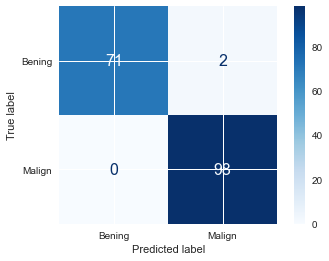

In [737]:
K=4
model = KNeighborsClassifier(K,p=1)
xt=x.drop(["types","target","mean symmetry", "worst area", "mean concave points", "fractal dimension error","mean compactness", "mean smoothness", "symmetry error", "worst concave points", "mean fractal dimension", "worst smoothness","worst perimeter"],axis=1)
train(model, xt, y)

# 8.- Conclusion

Even though, all classifiers methods actually performed very well, the K-Nearest Neighbor seems to be the most effective. Nevertheless, given thi high number of variables, the model may have been overfitted. We discard this possibility as we removed several features at a time and the explanatory power remained quite high as reflected by the performance measures yielded when fitting the model on the subsample data. We can conclude that some features, when highly correlated to other variables, do not add much to our classifiers methods, so the most efficient choice is to delete them. Finally, given the performance measures obtained we could rely without doubt into our classifiers to do predicitons regarding the Breast Cancer. A larger sampel would be helpful to have more solid basis. 